# Reading and cleaning the data for one station (min, max, mean)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the figure size to (14,6)
plt.rcParams['figure.figsize'] = (14,6)

In [2]:
# Reading data from berlin Tempelhof setion

df_tem_mean = pd.read_table("./data/predefined/mean/ECA_homblend_tg/TG_STAID002759.txt")
df_tem_min = pd.read_table("./data/predefined/min/ECA_homblend_tn/TN_STAID002759.txt")
df_tem_max = pd.read_table("./data/predefined/max/ECA_homblend_tx/TX_STAID002759.txt")
df_tem_mean.head(20)

EUROPEAN CLIMATE ASSESSMENT & DATASET (ECA&D), file created on: 08-04-2019
0   THESE DATA CAN BE USED FOR NON-COMMERCIAL RESE...                        
1   Squintu, AA, G. van der Schrier, Y. Brugnara a...                        
2   Int. J. of Climatol., 39, 1243-1261. doi:10.10...                        
3   Data and metadata available at http://www.ecad.eu                        
4           FILE FORMAT (MISSING VALUE CODE = -9999):                        
5                     01-06 STAID: Station identifier                        
6                      08-13 SOUID: Source identifier                        
7                          15-22 DATE : Date YYYYMMDD                        
8        24-28 TG   : Mean temperature in 0.1 &#176;C                        
9   30-34 Q_TG : quality code for TG (0='valid'; 1...                        
10  This is the homogenized and blended series of ...                        
11  Blended and updated with sources:11448 27488 9...                        
12  See files sources.txt and stations.txt for mor...                        
13                  STAID, SOUID,    DATE,   TG, Q_TG                        
14                   2759, 27488,18760101,   11,   -9                        
15                   2759, 27488,18760102,   14,   -9                        
16                   2759, 27488,18760103,  -10,   -9                        
17                   2759, 27488,18760104,  -78,   -9                        
18                   2759, 27488,18760105, -114,   -9                        
19                   2759, 27488,18760106,  -93,   -9

In [3]:
def clean_df_tg(df):
    """ This function gets a text file including 13 lines od explanation and then a comma separated table for 
    the mean values.
    It will first remove the explanation and then creates a data frame from the table and returns it.
    """
    df.drop(index=df.index[:14],inplace=True)
    rev = df["EUROPEAN CLIMATE ASSESSMENT & DATASET (ECA&D), file created on: 08-04-2019"].apply(lambda x: pd.Series([i for i in reversed(x.split(','))]))
    rev.rename(columns={4:"STAID",3:"SOUID",2:"DATE", 1:"TG", 0:"Q_TG"},inplace=True)
    rev = rev[["STAID", "SOUID", "DATE", "TG", "Q_TG"]]
    rev.reset_index(drop=True, inplace=True)
    rev["DATE"] = pd.to_datetime(rev["DATE"], format="%Y%m%d")
    rev = rev.astype({"Q_TG": int, "TG": int, "SOUID": int, "STAID": int}, errors='raise')
    return rev

def clean_df_tn(df):
    """ This function gets a text file including 13 lines od explanation and then a comma separated table for 
    the min values.
    It will first remove the explanation and then creates a data frame from the table and returns it.
    """
    df.drop(index=df.index[:14],inplace=True)
    rev = df["EUROPEAN CLIMATE ASSESSMENT & DATASET (ECA&D), file created on: 08-04-2019"].apply(lambda x: pd.Series([i for i in reversed(x.split(','))]))
    rev.rename(columns={4:"STAID",3:"SOUID",2:"DATE", 1:"TN", 0:"Q_TN"},inplace=True)
    rev = rev[["STAID", "SOUID", "DATE", "TN", "Q_TN"]]
    rev.reset_index(drop=True, inplace=True)
    rev["DATE"] = pd.to_datetime(rev["DATE"], format="%Y%m%d")
    rev = rev.astype({"Q_TN": int, "TN": int, "SOUID": int, "STAID": int}, errors='raise') 
    return rev


def clean_df_tx(df):
    """ This function gets a text file including 13 lines od explanation and then a comma separated table for 
    the max values.
    It will first remove the explanation and then creates a data frame from the table and returns it.
    """
    df.drop(index=df.index[:14],inplace=True)
    rev = df["EUROPEAN CLIMATE ASSESSMENT & DATASET (ECA&D), file created on: 08-04-2019"].apply(lambda x: pd.Series([i for i in reversed(x.split(','))]))
    rev.rename(columns={4:"STAID",3:"SOUID",2:"DATE", 1:"TX", 0:"Q_TX"},inplace=True)
    rev = rev[["STAID", "SOUID", "DATE", "TX", "Q_TX"]]
    rev.reset_index(drop=True, inplace=True)
    rev["DATE"] = pd.to_datetime(rev["DATE"], format="%Y%m%d")
    rev = rev.astype({"Q_TX": int, "TX": int, "SOUID": int, "STAID": int}, errors='raise') 
    return rev

In [4]:
df_tem_mean = clean_df_tg(df_tem_mean)
df_tem_mean.head()

STAID  SOUID       DATE   TG  Q_TG
0   2759  27488 1876-01-01   11    -9
1   2759  27488 1876-01-02   14    -9
2   2759  27488 1876-01-03  -10    -9
3   2759  27488 1876-01-04  -78    -9
4   2759  27488 1876-01-05 -114    -9

In [5]:
df_tem_min = clean_df_tn(df_tem_min)
df_tem_min.head()

STAID  SOUID       DATE  TN  Q_TN
0   2759  27801 1936-01-01  13    -9
1   2759  27801 1936-01-02  -8    -9
2   2759  27801 1936-01-03  14    -9
3   2759  27801 1936-01-04  28    -9
4   2759  27801 1936-01-05   1    -9

In [6]:
df_tem_max = clean_df_tx(df_tem_max)
df_tem_max.head()

STAID  SOUID       DATE  TX  Q_TX
0   2759  11450 1950-01-01 -15    -9
1   2759  11450 1950-01-02  16    -9
2   2759  11450 1950-01-03  43    -9
3   2759  11450 1950-01-04  29    -9
4   2759  11450 1950-01-05  -4    -9

## checking for missing values (missing values code = -9999)

In [7]:
# mean values dataframe
df_tem_mean[df_tem_mean.eq(-9999).any(1)]

Empty DataFrame
Columns: [STAID, SOUID, DATE, TG, Q_TG]
Index: []

In [8]:
# min values dataframe
df_tem_min[df_tem_min.eq(-9999).any(1)]

Empty DataFrame
Columns: [STAID, SOUID, DATE, TN, Q_TN]
Index: []

In [9]:
# max values dataframe
df_tem_max[df_tem_max.eq(-9999).any(1)]

Empty DataFrame
Columns: [STAID, SOUID, DATE, TX, Q_TX]
Index: []

## Analyzing the quality codes (0='valid'; 1='suspect'; 9='missing')

In [10]:
df_tem_mean["Q_TG"].unique()

array([-9])

In [11]:
df_tem_mean.dtypes

STAID             int64
SOUID             int64
DATE     datetime64[ns]
TG                int64
Q_TG              int64
dtype: object

In [12]:
df_tem_min["Q_TN"].unique()

array([-9])

In [13]:
df_tem_max["Q_TX"].unique()

array([-9])

## Visualization

In [14]:
df_tem_mean.shape

(52094, 5)

Text(0.5, 0, 'Date')

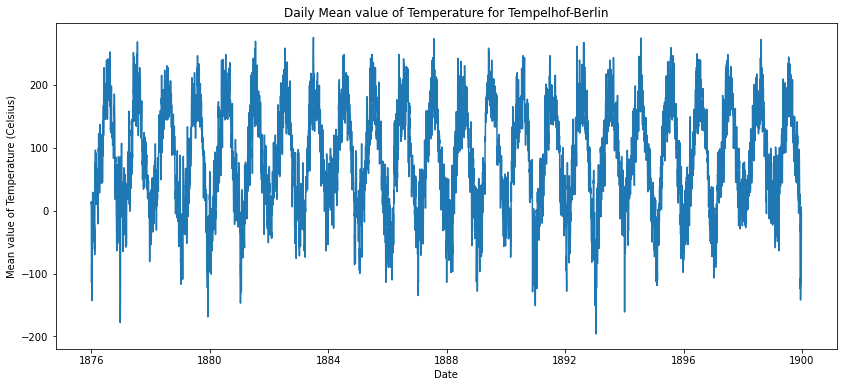

In [15]:
x = df_tem_mean.iloc[:8760, 2]
y = df_tem_mean.iloc[:8760, 3]
plt.plot(x, y)
plt.title('Daily Mean value of Temperature for Tempelhof-Berlin')
plt.ylabel('Mean value of Temperature (Celsius)')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

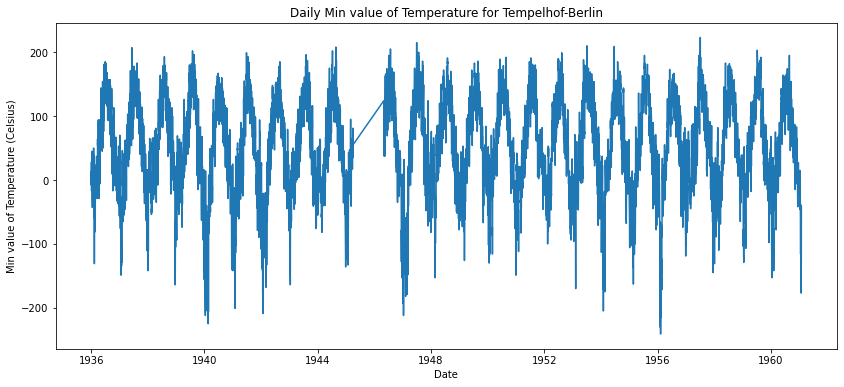

In [16]:
x = df_tem_min.iloc[:8760, 2]
y = df_tem_min.iloc[:8760, 3]
plt.plot(x, y)
plt.title('Daily Min value of Temperature for Tempelhof-Berlin')
plt.ylabel('Min value of Temperature (Celsius)')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

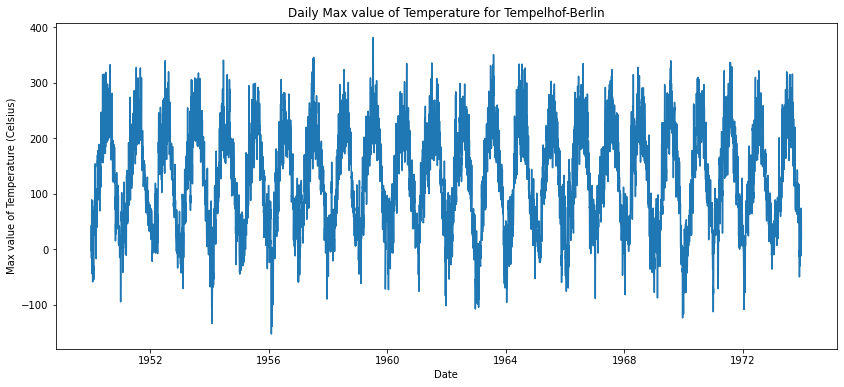

In [17]:
x = df_tem_max.iloc[:8760, 2]
y = df_tem_max.iloc[:8760, 3]
plt.plot(x, y)
plt.title('Daily Max value of Temperature for Tempelhof-Berlin')
plt.ylabel('Max value of Temperature (Celsius)')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

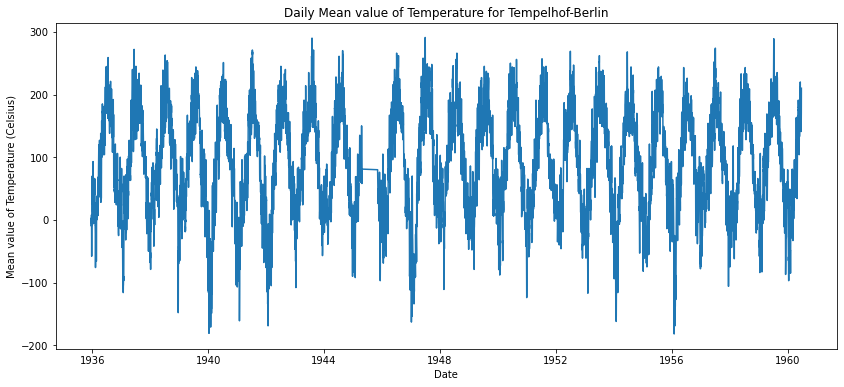

In [18]:
# Checking 1946 data in the mean values
x = df_tem_mean.iloc[21900:30660, 2]
y = df_tem_mean.iloc[21900:30660, 3]
plt.plot(x, y)
plt.title('Daily Mean value of Temperature for Tempelhof-Berlin')
plt.ylabel('Mean value of Temperature (Celsius)')
plt.xlabel('Date')

## Creating the time series dataframes

In [19]:
def time_series_df(df):
    """
    This function will remove the extra columns in the data frame and sets the date column as index.
    This function also drops the data before the year 1950 because we have a gap in year 1945-1947.
    """
    df.drop(['STAID', 'SOUID'], axis=1, inplace=True )
    df.drop(columns=df.columns[-1], axis=1, inplace=True)
    df.set_index("DATE", inplace=True)
    df = df.loc["1950-01-01":]
    df = df.div(10)
    return df

In [20]:
df_tem_mean = time_series_df(df_tem_mean)
df_tem_mean

TG
DATE           
1950-01-01 -4.0
1950-01-02  0.7
1950-01-03  2.9
1950-01-04 -0.4
1950-01-05 -3.5
...         ...
2019-02-24  5.1
2019-02-25  7.3
2019-02-26  7.7
2019-02-27  8.5
2019-02-28  9.9

[25261 rows x 1 columns]

In [21]:
df_tem_min = time_series_df(df_tem_min)
df_tem_min

TN
DATE           
1950-01-01 -5.5
1950-01-02 -4.6
1950-01-03  1.1
1950-01-04 -1.2
1950-01-05 -4.2
...         ...
2019-02-24 -2.7
2019-02-25  0.9
2019-02-26  3.7
2019-02-27  0.5
2019-02-28  6.6

[25261 rows x 1 columns]

In [22]:
df_tem_max = time_series_df(df_tem_max)
df_tem_max

TX
DATE            
1950-01-01  -1.5
1950-01-02   1.6
1950-01-03   4.3
1950-01-04   2.9
1950-01-05  -0.4
...          ...
2019-02-24  13.2
2019-02-25  14.0
2019-02-26  11.9
2019-02-27  16.7
2019-02-28  13.0

[16129 rows x 1 columns]

In [23]:
df_tem_mean.shape

(25261, 1)

In [24]:
df_tem_min.shape

(25261, 1)

In [25]:
df_tem_max.shape

(16129, 1)

Text(0.5, 0, 'Date')

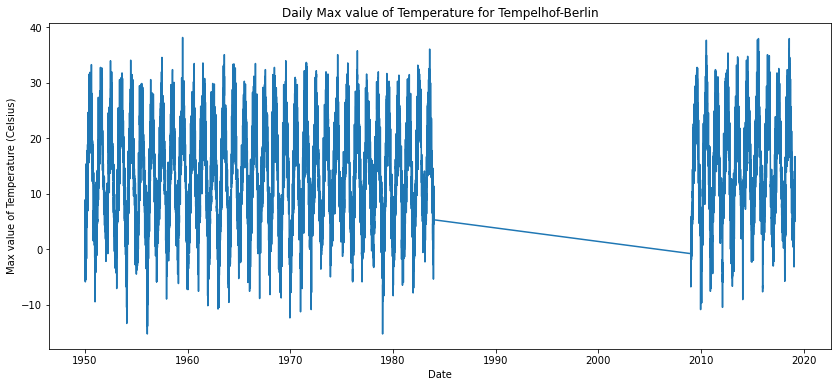

In [26]:
# x = df_tem_max.iloc[:8760, 2]
# y = df_tem_max.iloc[:8760, 3]
plt.plot(df_tem_max)
plt.title('Daily Max value of Temperature for Tempelhof-Berlin')
plt.ylabel('Max value of Temperature (Celsius)')
plt.xlabel('Date')

# Train-Test split

In [27]:
df_tem_mean_train = df_tem_mean[:"2017-12-31"]
df_tem_mean_test = df_tem_mean["2018-01-01":]
df_tem_mean_train.shape, df_tem_mean_test.shape

((24837, 1), (424, 1))

In [28]:
df_tem_min_train = df_tem_min[:"2017-12-31"]
df_tem_min_test = df_tem_min["2018-01-01":]
df_tem_min_train.shape, df_tem_min_test.shape

((24837, 1), (424, 1))

In [29]:
df_tem_max_train = df_tem_max[:"1980-12-01"]
df_tem_max_test1 = df_tem_max["1981-01-01":"1983-12-31"]
df_tem_max_test2 = df_tem_max["2009-01-01":]
df_tem_max_train.shape, df_tem_max_test1.shape, df_tem_max_test2.shape

((11293, 1), (1095, 1), (3711, 1))

In [30]:
df_tem_mean_train["month"] = df_tem_mean_train.index.month
df_tem_mean_train["year"] = df_tem_mean_train.index.year
df_tem_mean_train = round(df_tem_mean_train.groupby(["year","month"], as_index=False).mean(), 2)
df_tem_mean_train.head(20)

/tmp/ipykernel_188835/620649221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_mean_train["month"] = df_tem_mean_train.index.month
/tmp/ipykernel_188835/620649221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_mean_train["year"] = df_tem_mean_train.index.year


year  month     TG
0   1950      1  -1.80
1   1950      2   2.72
2   1950      3   5.30
3   1950      4   7.95
4   1950      5  15.57
5   1950      6  18.87
6   1950      7  18.67
7   1950      8  19.49
8   1950      9  13.73
9   1950     10   8.55
10  1950     11   4.66
11  1950     12  -1.25
12  1951      1   0.81
13  1951      2   1.89
14  1951      3   2.16
15  1951      4   8.99
16  1951      5  12.47
17  1951      6  17.43
18  1951      7  18.90
19  1951      8  19.56

In [31]:
df_tem_min_train["month"] = df_tem_min_train.index.month
df_tem_min_train["year"] = df_tem_min_train.index.year
df_tem_min_train = round(df_tem_min_train.groupby(["year", "month"], as_index=False).mean(), 2)
df_tem_min_train.head()

/tmp/ipykernel_188835/4078593556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_min_train["month"] = df_tem_min_train.index.month
/tmp/ipykernel_188835/4078593556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_min_train["year"] = df_tem_min_train.index.year


year  month     TN
0  1950      1  -4.99
1  1950      2  -0.25
2  1950      3   1.26
3  1950      4   3.77
4  1950      5  10.27

In [32]:
df_tem_max_train["month"] = df_tem_max_train.index.month
df_tem_max_train["year"] = df_tem_max_train.index.year
df_tem_max_train = round(df_tem_max_train.groupby(["year", "month"], as_index=False).mean(), 2)
df_tem_max_train.head()

/tmp/ipykernel_188835/4023302559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_max_train["month"] = df_tem_max_train.index.month
/tmp/ipykernel_188835/4023302559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_max_train["year"] = df_tem_max_train.index.year


year  month     TX
0  1950      1   1.15
1  1950      2   5.79
2  1950      3   9.31
3  1950      4  12.38
4  1950      5  20.79

In [33]:
def date_index(df):
    df["index"] = df["year"].astype(str) + "-" + df["month"].astype(str)
    df["index"] = pd.to_datetime(df["index"], format="%Y-%m")
    df.set_index("index", inplace=True)
    return df

In [34]:
df_tem_mean_train = date_index(df_tem_mean_train)
df_tem_mean_train.head()

year  month     TG
index                         
1950-01-01  1950      1  -1.80
1950-02-01  1950      2   2.72
1950-03-01  1950      3   5.30
1950-04-01  1950      4   7.95
1950-05-01  1950      5  15.57

In [35]:
df_tem_min_train = date_index(df_tem_min_train)
df_tem_min_train.head()

year  month     TN
index                         
1950-01-01  1950      1  -4.99
1950-02-01  1950      2  -0.25
1950-03-01  1950      3   1.26
1950-04-01  1950      4   3.77
1950-05-01  1950      5  10.27

In [36]:
df_tem_max_train = date_index(df_tem_max_train)
df_tem_max_train.head()

year  month     TX
index                         
1950-01-01  1950      1   1.15
1950-02-01  1950      2   5.79
1950-03-01  1950      3   9.31
1950-04-01  1950      4  12.38
1950-05-01  1950      5  20.79

# Model the trend

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
df_tem_mean_train["timestep"] = range(len(df_tem_mean_train))
df_tem_mean_train.head()

year  month     TG  timestep
index                                   
1950-01-01  1950      1  -1.80         0
1950-02-01  1950      2   2.72         1
1950-03-01  1950      3   5.30         2
1950-04-01  1950      4   7.95         3
1950-05-01  1950      5  15.57         4

In [39]:
df_tem_min_train["timestep"] = range(len(df_tem_min_train))
df_tem_min_train.head()

year  month     TN  timestep
index                                   
1950-01-01  1950      1  -4.99         0
1950-02-01  1950      2  -0.25         1
1950-03-01  1950      3   1.26         2
1950-04-01  1950      4   3.77         3
1950-05-01  1950      5  10.27         4

In [40]:
df_tem_max_train["timestep"] = range(len(df_tem_max_train))
df_tem_max_train.head()

year  month     TX  timestep
index                                   
1950-01-01  1950      1   1.15         0
1950-02-01  1950      2   5.79         1
1950-03-01  1950      3   9.31         2
1950-04-01  1950      4  12.38         3
1950-05-01  1950      5  20.79         4

In [41]:
X_temp_mean_train = df_tem_mean_train[['timestep']] 
y_temp_mean_train = df_tem_mean_train['TG']

In [42]:
X_temp_min_train = df_tem_min_train[['timestep']] 
y_temp_min_train = df_tem_min_train['TN']

In [43]:
X_temp_max_train = df_tem_max_train[['timestep']] 
y_temp_max_train = df_tem_max_train['TX']

In [44]:
m_tr = LinearRegression()

In [45]:
m_tr.fit(X_temp_mean_train,y_temp_mean_train)
m_tr.fit(X_temp_min_train,y_temp_min_train )
m_tr.fit(X_temp_max_train,y_temp_max_train)

LinearRegression()

In [46]:
df_tem_mean_train['trend'] = m_tr.predict(X_temp_mean_train)
df_tem_min_train['trend'] = m_tr.predict(X_temp_min_train)
df_tem_max_train['trend'] = m_tr.predict(X_temp_max_train)

Text(0.5, 0, 'Year')

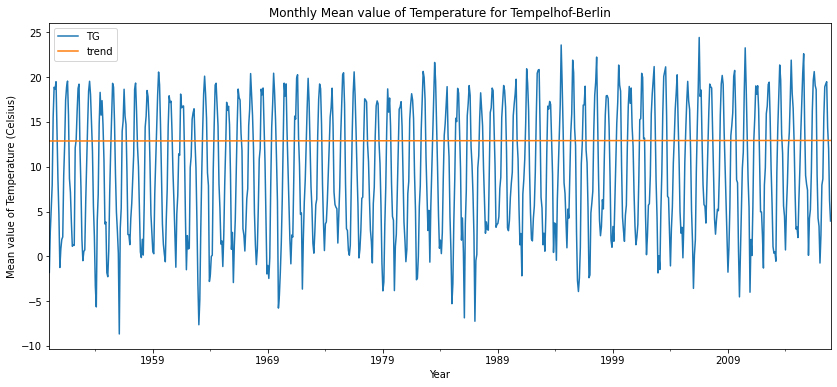

In [47]:
df_tem_mean_train[['TG','trend']].plot()
plt.title('Monthly Mean value of Temperature for Tempelhof-Berlin')
plt.ylabel('Mean value of Temperature (Celsius)')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

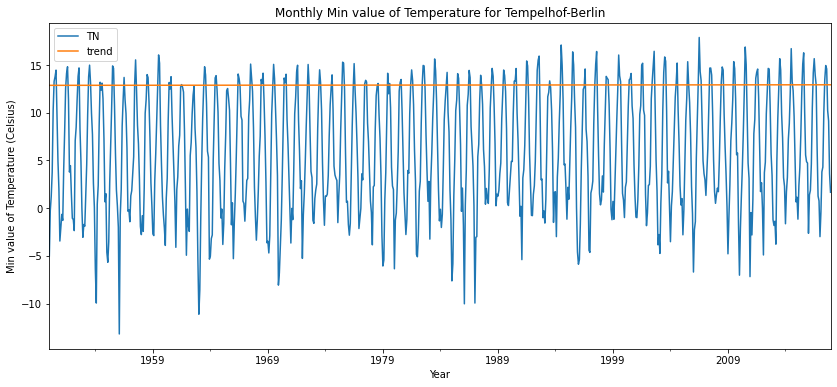

In [48]:
df_tem_min_train[['TN','trend']].plot()
plt.title('Monthly Min value of Temperature for Tempelhof-Berlin')
plt.ylabel('Min value of Temperature (Celsius)')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

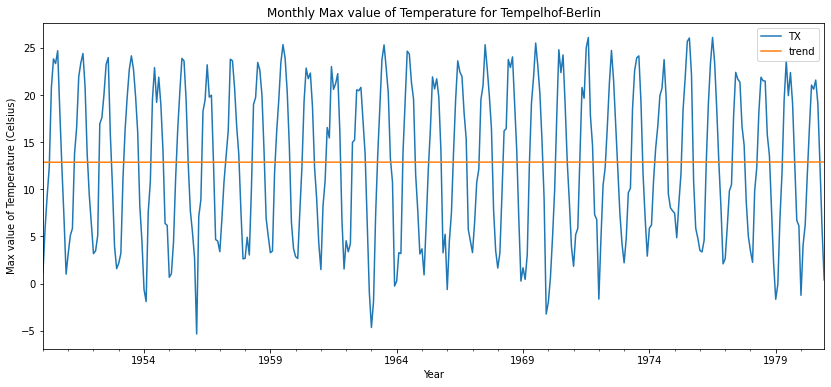

In [49]:
df_tem_max_train[['TX','trend']].plot()
plt.title('Monthly Max value of Temperature for Tempelhof-Berlin')
plt.ylabel('Max value of Temperature (Celsius)')
plt.xlabel('Year')

# Model the seasonality and trend

In [50]:
# One-Hot-Encoding the month for mean values
seasonal_dummies_tem_mean_train = pd.get_dummies(df_tem_mean_train.index.month,
                                  prefix='month',
                                  drop_first=True).set_index(df_tem_mean_train.index)
seasonal_dummies_tem_mean_train

month_2  month_3  month_4  month_5  month_6  month_7  month_8  \
index                                                                       
1950-01-01        0        0        0        0        0        0        0   
1950-02-01        1        0        0        0        0        0        0   
1950-03-01        0        1        0        0        0        0        0   
1950-04-01        0        0        1        0        0        0        0   
1950-05-01        0        0        0        1        0        0        0   
...             ...      ...      ...      ...      ...      ...      ...   
2017-08-01        0        0        0        0        0        0        1   
2017-09-01        0        0        0        0        0        0        0   
2017-10-01        0        0        0        0        0        0        0   
2017-11-01        0        0        0        0        0        0        0   
2017-12-01        0        0        0        0        0        0        0   

            month_9  month_10  month_11  month_12  
index                                              
1950-01-01        0         0         0         0  
1950-02-01        0         0         0         0  
1950-03-01        0         0         0         0  
1950-04-01        0         0         0         0  
1950-05-01        0         0         0         0  
...             ...       ...       ...       ...  
2017-08-01        0         0         0         0  
2017-09-01        1         0         0         0  
2017-10-01        0         1         0         0  
2017-11-01        0         0         1         0  
2017-12-01        0         0         0         1  

[816 rows x 11 columns]

In [51]:
df_tem_mean_train = df_tem_mean_train.join(seasonal_dummies_tem_mean_train)
df_tem_mean_train

year  month     TG  timestep      trend  month_2  month_3  \
index                                                                   
1950-01-01  1950      1  -1.80         0  12.874780        0        0   
1950-02-01  1950      2   2.72         1  12.874850        1        0   
1950-03-01  1950      3   5.30         2  12.874920        0        1   
1950-04-01  1950      4   7.95         3  12.874990        0        0   
1950-05-01  1950      5  15.57         4  12.875059        0        0   
...          ...    ...    ...       ...        ...      ...      ...   
2017-08-01  2017      8  19.49       811  12.931449        0        0   
2017-09-01  2017      9  14.35       812  12.931519        0        0   
2017-10-01  2017     10  12.03       813  12.931589        0        0   
2017-11-01  2017     11   6.22       814  12.931659        0        0   
2017-12-01  2017     12   3.94       815  12.931729        0        0   

            month_4  month_5  month_6  month_7  month_8  month_9  month_10  \
index                                                                        
1950-01-01        0        0        0        0        0        0         0   
1950-02-01        0        0        0        0        0        0         0   
1950-03-01        0        0        0        0        0        0         0   
1950-04-01        1        0        0        0        0        0         0   
1950-05-01        0        1        0        0        0        0         0   
...             ...      ...      ...      ...      ...      ...       ...   
2017-08-01        0        0        0        0        1        0         0   
2017-09-01        0        0        0        0        0        1         0   
2017-10-01        0        0        0        0        0        0         1   
2017-11-01        0        0        0        0        0        0         0   
2017-12-01        0        0        0        0        0        0         0   

            month_11  month_12  
index                           
1950-01-01         0         0  
1950-02-01         0         0  
1950-03-01         0         0  
1950-04-01         0         0  
1950-05-01         0         0  
...              ...       ...  
2017-08-01         0         0  
2017-09-01         0         0  
2017-10-01         0         0  
2017-11-01         1         0  
2017-12-01         0         1  

[816 rows x 16 columns]

In [52]:
# One-Hot-Encoding the month for min values
seasonal_dummies_tem_min_train = pd.get_dummies(df_tem_min_train.index.month,
                                  prefix='month',
                                  drop_first=True).set_index(df_tem_min_train.index)
df_tem_min_train = df_tem_min_train.join(seasonal_dummies_tem_min_train)

In [53]:
# One-Hot-Encoding the month for max values
seasonal_dummies_tem_max_train = pd.get_dummies(df_tem_max_train.index.month,
                                  prefix='month',
                                  drop_first=True).set_index(df_tem_max_train.index)
df_tem_max_train = df_tem_max_train.join(seasonal_dummies_tem_max_train)

In [54]:
# Define X and y
X_temp_mean_train = df_tem_mean_train.drop(columns=['TG', 'year', 'month', 'trend'])
y_temp_mean_train = df_tem_mean_train['TG']

In [55]:
X_temp_min_train = df_tem_min_train.drop(columns=['TN', 'year', 'month', 'trend'])
y_temp_min_train = df_tem_min_train['TN']

In [56]:
X_temp_max_train = df_tem_max_train.drop(columns=['TX', 'year', 'month', 'trend'])
y_temp_max_train = df_tem_max_train['TX']

In [57]:
# Create a model with trend and seasonality
m_se_tr = LinearRegression()
m_se_tr.fit(X_temp_mean_train, y_temp_mean_train)
df_tem_mean_train['trend + seasonal'] = m_se_tr.predict(X_temp_mean_train)
df_tem_mean_train.head()

year  month     TG  timestep      trend  month_2  month_3  \
index                                                                   
1950-01-01  1950      1  -1.80         0  12.874780        0        0   
1950-02-01  1950      2   2.72         1  12.874850        1        0   
1950-03-01  1950      3   5.30         2  12.874920        0        1   
1950-04-01  1950      4   7.95         3  12.874990        0        0   
1950-05-01  1950      5  15.57         4  12.875059        0        0   

            month_4  month_5  month_6  month_7  month_8  month_9  month_10  \
index                                                                        
1950-01-01        0        0        0        0        0        0         0   
1950-02-01        0        0        0        0        0        0         0   
1950-03-01        0        0        0        0        0        0         0   
1950-04-01        1        0        0        0        0        0         0   
1950-05-01        0        1        0        0        0        0         0   

            month_11  month_12  trend + seasonal  
index                                             
1950-01-01         0         0         -0.749992  
1950-02-01         0         0          0.071332  
1950-03-01         0         0          3.516773  
1950-04-01         0         0          8.186626  
1950-05-01         0         0         13.176773

In [58]:
m_se_tr.fit(X_temp_min_train, y_temp_min_train)
df_tem_min_train['trend + seasonal'] = m_se_tr.predict(X_temp_min_train)
df_tem_min_train.head()

year  month     TN  timestep      trend  month_2  month_3  \
index                                                                   
1950-01-01  1950      1  -4.99         0  12.874780        0        0   
1950-02-01  1950      2  -0.25         1  12.874850        1        0   
1950-03-01  1950      3   1.26         2  12.874920        0        1   
1950-04-01  1950      4   3.77         3  12.874990        0        0   
1950-05-01  1950      5  10.27         4  12.875059        0        0   

            month_4  month_5  month_6  month_7  month_8  month_9  month_10  \
index                                                                        
1950-01-01        0        0        0        0        0        0         0   
1950-02-01        0        0        0        0        0        0         0   
1950-03-01        0        0        0        0        0        0         0   
1950-04-01        1        0        0        0        0        0         0   
1950-05-01        0        1        0        0        0        0         0   

            month_11  month_12  trend + seasonal  
index                                             
1950-01-01         0         0         -3.071730  
1950-02-01         0         0         -2.600407  
1950-03-01         0         0          0.131652  
1950-04-01         0         0          3.679446  
1950-05-01         0         0          8.164888

In [59]:
m_se_tr.fit(X_temp_max_train, y_temp_max_train)
df_tem_max_train['trend + seasonal'] = m_se_tr.predict(X_temp_max_train)
df_tem_max_train.head()

year  month     TX  timestep      trend  month_2  month_3  \
index                                                                   
1950-01-01  1950      1   1.15         0  12.874780        0        0   
1950-02-01  1950      2   5.79         1  12.874850        1        0   
1950-03-01  1950      3   9.31         2  12.874920        0        1   
1950-04-01  1950      4  12.38         3  12.874990        0        0   
1950-05-01  1950      5  20.79         4  12.875059        0        0   

            month_4  month_5  month_6  month_7  month_8  month_9  month_10  \
index                                                                        
1950-01-01        0        0        0        0        0        0         0   
1950-02-01        0        0        0        0        0        0         0   
1950-03-01        0        0        0        0        0        0         0   
1950-04-01        1        0        0        0        0        0         0   
1950-05-01        0        1        0        0        0        0         0   

            month_11  month_12  trend + seasonal  
index                                             
1950-01-01         0         0          1.902959  
1950-02-01         0         0          3.307475  
1950-03-01         0         0          7.638765  
1950-04-01         0         0         12.939733  
1950-05-01         0         0         18.222314

Text(0.5, 0, 'Year')

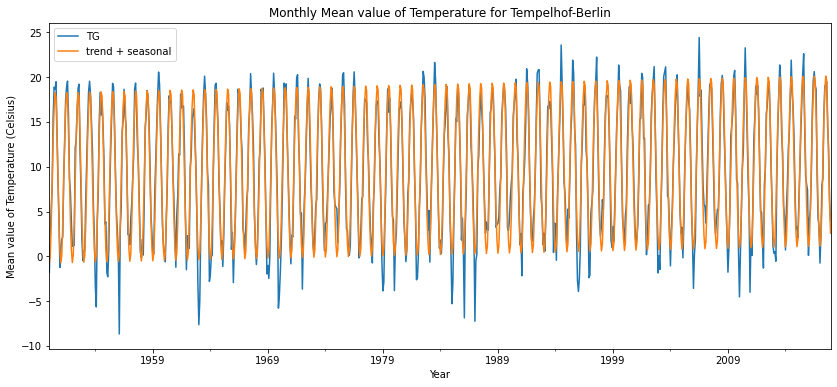

In [60]:
df_tem_mean_train[['TG', 'trend + seasonal']].plot()
plt.title('Monthly Mean value of Temperature for Tempelhof-Berlin')
plt.ylabel('Mean value of Temperature (Celsius)')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

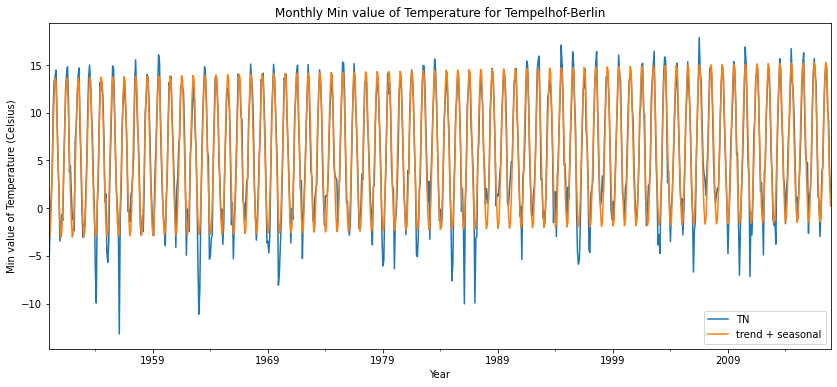

In [61]:
df_tem_min_train[['TN', 'trend + seasonal']].plot()
plt.title('Monthly Min value of Temperature for Tempelhof-Berlin')
plt.ylabel('Min value of Temperature (Celsius)')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

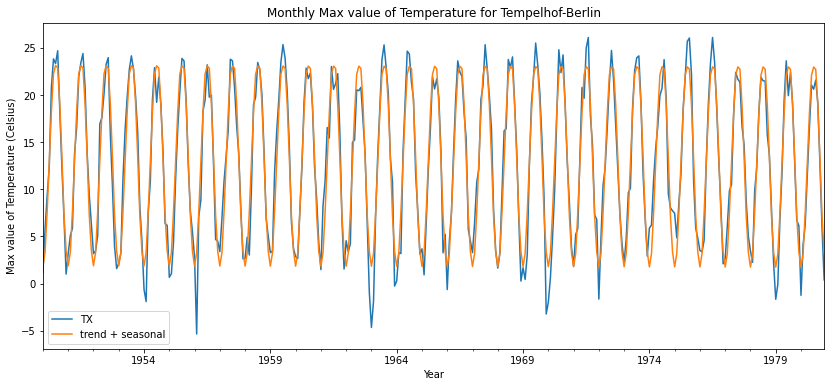

In [62]:
df_tem_max_train[['TX', 'trend + seasonal']].plot()
plt.title('Monthly Max value of Temperature for Tempelhof-Berlin')
plt.ylabel('Max value of Temperature (Celsius)')
plt.xlabel('Year')

# Extract the remainder

<AxesSubplot:xlabel='index'>

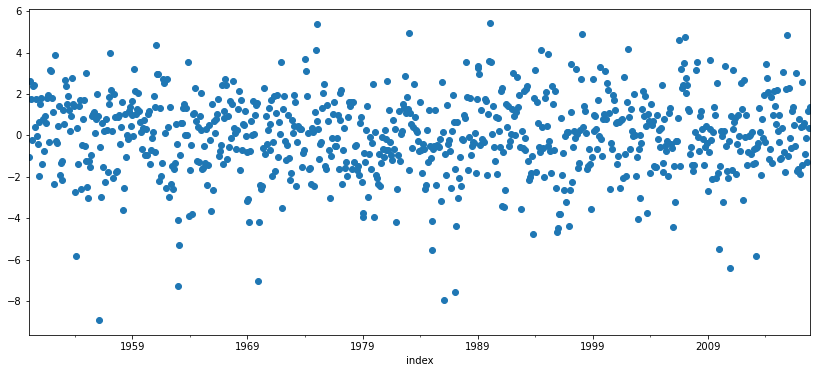

In [63]:
df_tem_mean_train['remainder'] = df_tem_mean_train['TG'] - df_tem_mean_train['trend + seasonal']
df_tem_mean_train['remainder'].plot(style='o')

In [64]:
df_tem_mean_train['remainder'].to_csv('df_tem_mean_train_remainder.csv')
!ls -al df_tem_mean_train_remainder.csv

-rw-rw-r-- 1 esharifi esharifi 24810 Aug 26 11:08 df_tem_mean_train_remainder.csv


<AxesSubplot:xlabel='index'>

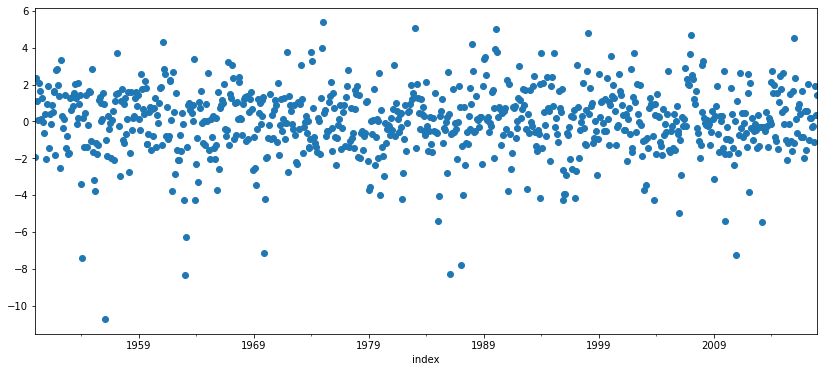

In [65]:
df_tem_min_train['remainder'] = df_tem_min_train['TN'] - df_tem_min_train['trend + seasonal']
df_tem_min_train['remainder'].plot(style='o')

In [66]:
df_tem_min_train['remainder'].to_csv('df_tem_min_train_remainder.csv')
!ls -al df_tem_min_train_remainder.csv

-rw-rw-r-- 1 esharifi esharifi 24843 Aug 26 11:08 df_tem_min_train_remainder.csv


<AxesSubplot:xlabel='index'>

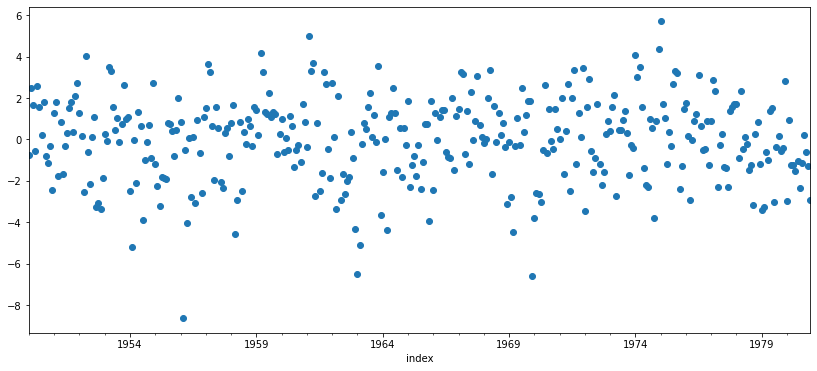

In [67]:
df_tem_max_train['remainder'] = df_tem_max_train['TX'] - df_tem_max_train['trend + seasonal']
df_tem_max_train['remainder'].plot(style='o')

In [68]:
df_tem_max_train['remainder'].to_csv('df_tem_max_train_remainder.csv')
!ls -al df_tem_max_train_remainder.csv

-rw-rw-r-- 1 esharifi esharifi 11291 Aug 26 11:08 df_tem_max_train_remainder.csv


# Modelling Autoregression for just Remainder

## Load the remainder data

In [69]:
import seaborn as sns

from statsmodels.api import OLS, add_constant, qqplot
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.graphics.tsaplots import plot_pacf

# Set figure size to (14,6)
plt.rcParams['figure.figsize'] = (14,6)
plt.rcParams['font.size'] = '14'

In [70]:
remainder_tem_mean_train= pd.read_csv('df_tem_mean_train_remainder.csv', index_col=0, parse_dates=True)
remainder_tem_mean_train.head()

remainder
index                
1950-01-01  -1.050008
1950-02-01   2.648668
1950-03-01   1.783227
1950-04-01  -0.236626
1950-05-01   2.393227

In [71]:
remainder_tem_min_train= pd.read_csv('df_tem_min_train_remainder.csv', index_col=0, parse_dates=True)
remainder_tem_min_train.head()

remainder
index                
1950-01-01  -1.918270
1950-02-01   2.350407
1950-03-01   1.128348
1950-04-01   0.090554
1950-05-01   2.105112

In [72]:
remainder_tem_max_train= pd.read_csv('df_tem_max_train_remainder.csv', index_col=0, parse_dates=True)
remainder_tem_max_train.head()

remainder
index                
1950-01-01  -0.752959
1950-02-01   2.482525
1950-03-01   1.671235
1950-04-01  -0.559733
1950-05-01   2.567686

## Create a time-lagged input feature: lag1

In [73]:
remainder_tem_mean_train['lag1'] = remainder_tem_mean_train['remainder'].shift(1)

remainder_tem_mean_train.head()

remainder      lag1
index                          
1950-01-01  -1.050008       NaN
1950-02-01   2.648668 -1.050008
1950-03-01   1.783227  2.648668
1950-04-01  -0.236626  1.783227
1950-05-01   2.393227 -0.236626

In [74]:
remainder_tem_min_train['lag1'] = remainder_tem_min_train['remainder'].shift(1)

remainder_tem_min_train.head()

remainder      lag1
index                          
1950-01-01  -1.918270       NaN
1950-02-01   2.350407 -1.918270
1950-03-01   1.128348  2.350407
1950-04-01   0.090554  1.128348
1950-05-01   2.105112  0.090554

In [75]:
remainder_tem_max_train['lag1'] = remainder_tem_max_train['remainder'].shift(1)

remainder_tem_max_train.head()

remainder      lag1
index                          
1950-01-01  -0.752959       NaN
1950-02-01   2.482525 -0.752959
1950-03-01   1.671235  2.482525
1950-04-01  -0.559733  1.671235
1950-05-01   2.567686 -0.559733

## Inspect correlations

In [76]:
round(remainder_tem_mean_train.corr(), 2)

remainder  lag1
remainder       1.00  0.22
lag1            0.22  1.00

In [77]:
round(remainder_tem_min_train.corr(), 2)

remainder  lag1
remainder       1.00  0.22
lag1            0.22  1.00

In [78]:
round(remainder_tem_max_train.corr(), 2)

remainder  lag1
remainder       1.00  0.22
lag1            0.22  1.00

## Plot remainder against lag1

Text(0, 0.5, 'remainder')

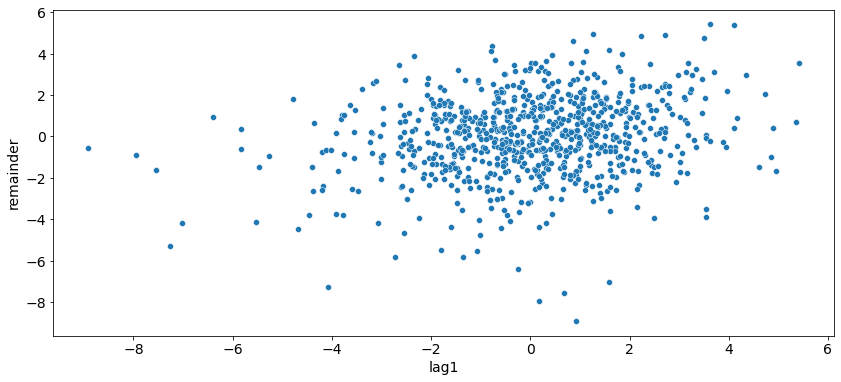

In [79]:
sns.scatterplot(x='lag1', y='remainder', data=remainder_tem_mean_train);
plt.xlabel('lag1')
plt.ylabel('remainder')

Text(0, 0.5, 'remainder')

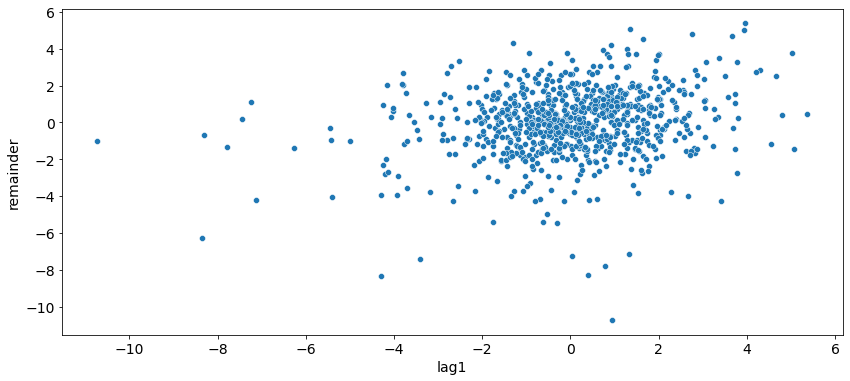

In [80]:
sns.scatterplot(x='lag1', y='remainder', data=remainder_tem_min_train);
plt.xlabel('lag1')
plt.ylabel('remainder')

Text(0, 0.5, 'remainder')

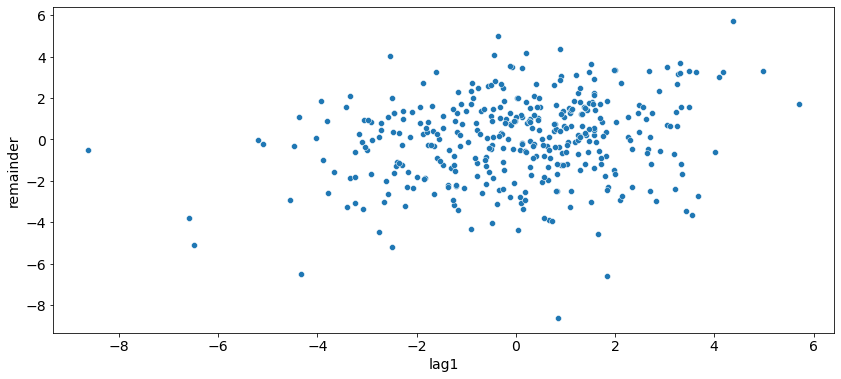

In [81]:
sns.scatterplot(x='lag1', y='remainder', data=remainder_tem_max_train);
plt.xlabel('lag1')
plt.ylabel('remainder')

## Run an Autoregression (Linear Regression) of lag1 on the remainder

In [82]:
# Drop missing values
remainder_tem_mean_train.dropna(inplace = True)
remainder_tem_mean_train.head()

remainder      lag1
index                          
1950-02-01   2.648668 -1.050008
1950-03-01   1.783227  2.648668
1950-04-01  -0.236626  1.783227
1950-05-01   2.393227 -0.236626
1950-06-01   2.412639  2.393227

In [83]:
remainder_tem_min_train.dropna(inplace = True)
remainder_tem_min_train.head()

remainder      lag1
index                          
1950-02-01   2.350407 -1.918270
1950-03-01   1.128348  2.350407
1950-04-01   0.090554  1.128348
1950-05-01   2.105112  0.090554
1950-06-01   1.642759  2.105112

In [84]:
remainder_tem_max_train.dropna(inplace = True)
remainder_tem_max_train.head()

remainder      lag1
index                          
1950-02-01   2.482525 -0.752959
1950-03-01   1.671235  2.482525
1950-04-01  -0.559733  1.671235
1950-05-01   2.567686 -0.559733
1950-06-01   1.571880  2.567686

In [85]:
# Assign X and y
X_tem_mean_train_ar = remainder_tem_mean_train[['lag1']]
y_tem_mean_train_ar = remainder_tem_mean_train['remainder']

In [86]:
X_tem_min_train_ar = remainder_tem_min_train[['lag1']]
y_tem_min_train_ar = remainder_tem_min_train['remainder']

In [87]:
X_tem_max_train_ar = remainder_tem_max_train[['lag1']]
y_tem_max_train_ar = remainder_tem_max_train['remainder']

In [88]:
m_re = LinearRegression()
m_re.fit(X_tem_mean_train_ar, y_tem_mean_train_ar)
m_re.fit(X_tem_min_train_ar, y_tem_min_train_ar)
m_re.fit(X_tem_max_train_ar, y_tem_max_train_ar)

LinearRegression()

In [89]:
# Create predictions
remainder_tem_mean_train['predictions_ar1'] = m_re.predict(X_tem_mean_train_ar)
remainder_tem_mean_train.head()

remainder      lag1  predictions_ar1
index                                           
1950-02-01   2.648668 -1.050008        -0.232751
1950-03-01   1.783227  2.648668         0.588127
1950-04-01  -0.236626  1.783227         0.396052
1950-05-01   2.393227 -0.236626        -0.052230
1950-06-01   2.412639  2.393227         0.531435

In [90]:
remainder_tem_min_train['predictions_ar1'] = m_re.predict(X_tem_min_train_ar)
remainder_tem_min_train.head()

remainder      lag1  predictions_ar1
index                                           
1950-02-01   2.350407 -1.918270        -0.425452
1950-03-01   1.128348  2.350407         0.521931
1950-04-01   0.090554  1.128348         0.250709
1950-05-01   2.105112  0.090554         0.020383
1950-06-01   1.642759  2.105112         0.467491

In [91]:
remainder_tem_max_train['predictions_ar1'] = m_re.predict(X_tem_max_train_ar)
remainder_tem_max_train.head()

remainder      lag1  predictions_ar1
index                                           
1950-02-01   2.482525 -0.752959        -0.166824
1950-03-01   1.671235  2.482525         0.551253
1950-04-01  -0.559733  1.671235         0.371197
1950-05-01   2.567686 -0.559733        -0.123940
1950-06-01   1.571880  2.567686         0.570154

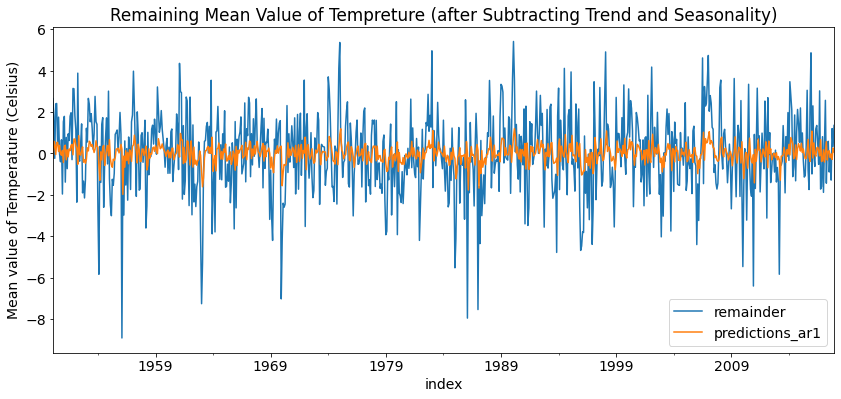

In [92]:
# Plot the original remainder and the prediction
remainder_tem_mean_train[['remainder', 'predictions_ar1']].plot()
plt.title("Remaining Mean Value of Tempreture (after Subtracting Trend and Seasonality)")
plt.ylabel("Mean value of Temperature (Celsius)")
plt.show()


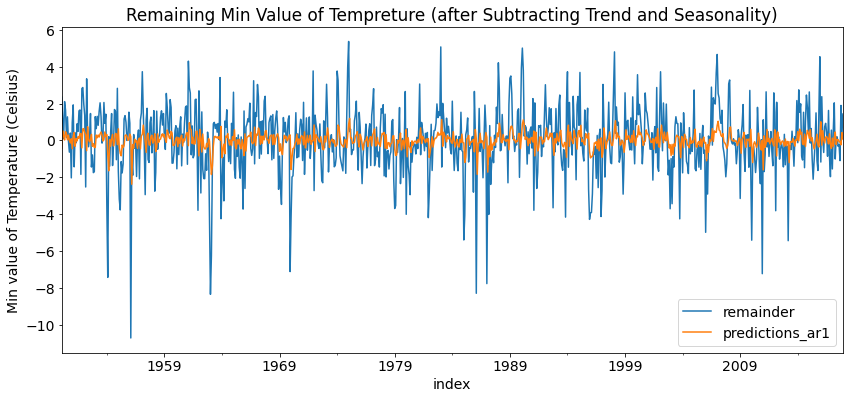

In [93]:
remainder_tem_min_train[['remainder', 'predictions_ar1']].plot()
plt.title("Remaining Min Value of Tempreture (after Subtracting Trend and Seasonality)")
plt.ylabel("Min value of Temperature (Celsius)")
plt.show()

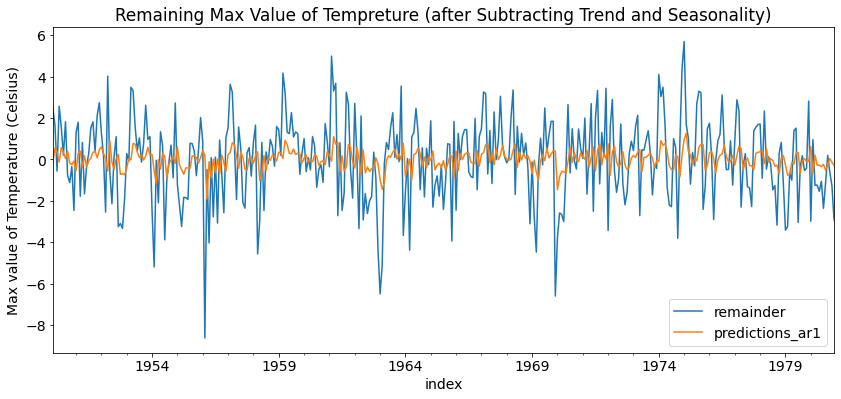

In [94]:
remainder_tem_max_train[['remainder', 'predictions_ar1']].plot()
plt.title("Remaining Max Value of Tempreture (after Subtracting Trend and Seasonality)")
plt.ylabel("Max value of Temperature (Celsius)")
plt.show()

<AxesSubplot:xlabel='index'>

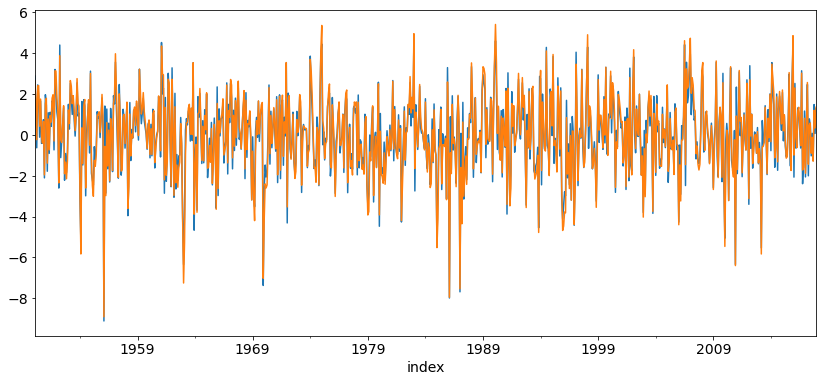

In [95]:
# Mean values: Is the remainder prediction error smaller than the remainder itself?
(remainder_tem_mean_train['remainder'] - remainder_tem_mean_train['predictions_ar1']).plot()
remainder_tem_mean_train['remainder'].plot()

In [96]:
SAE = sum(abs(number) for number in remainder_tem_mean_train['remainder'])
print(f"""SAE if we did not use AR = {SAE}""")
SAE_AR = sum(abs(number) for number in remainder_tem_mean_train['remainder'] - remainder_tem_mean_train['predictions_ar1'])
print(f"""SAE if we use AR = {SAE_AR}""")
SAE_LAG = sum(abs(number) for number in remainder_tem_mean_train['remainder'] - remainder_tem_mean_train['lag1'])
print(f"""SAE if we use remainder of prev. t to predict t+1 = {SAE_LAG}""")

#SAE: Sum of Absolute Error

SAE if we did not use AR = 1207.8492607693627
SAE if we use AR = 1182.43650829217
SAE if we use remainder of prev. t to predict t+1 = 1515.842769925945


<AxesSubplot:xlabel='index'>

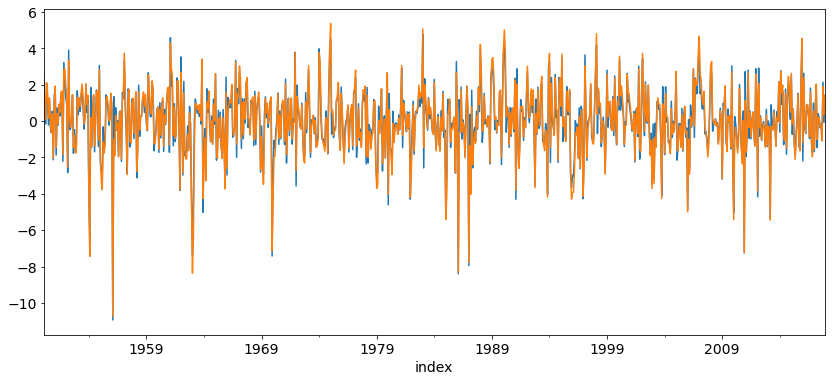

In [97]:
# Min values: Is the remainder prediction error smaller than the remainder itself?
(remainder_tem_min_train['remainder'] - remainder_tem_min_train['predictions_ar1']).plot()
remainder_tem_min_train['remainder'].plot()

In [98]:
SAE = sum(abs(number) for number in remainder_tem_min_train['remainder'])
print(f"""SAE if we did not use AR = {SAE}""")
SAE_AR = sum(abs(number) for number in remainder_tem_min_train['remainder'] - remainder_tem_min_train['predictions_ar1'])
print(f"""SAE if we use AR = {SAE_AR}""")
SAE_LAG = sum(abs(number) for number in remainder_tem_min_train['remainder'] - remainder_tem_min_train['lag1'])
print(f"""SAE if we use remainder of prev. t to predict t+1 = {SAE_LAG}""")

SAE if we did not use AR = 1103.6979656624173
SAE if we use AR = 1087.0393789724749
SAE if we use remainder of prev. t to predict t+1 = 1398.5200357706376


<AxesSubplot:xlabel='index'>

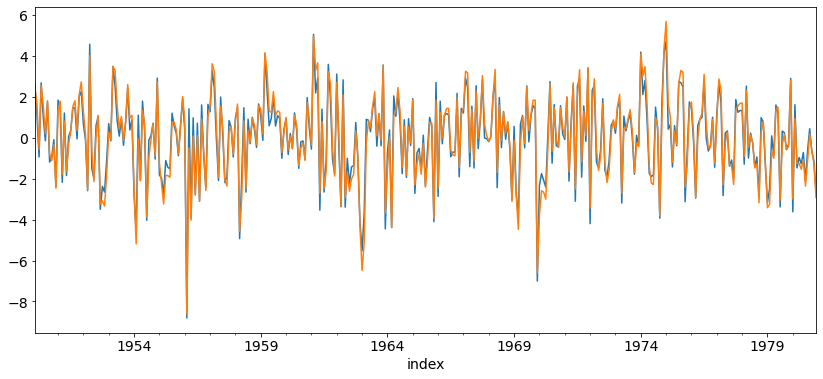

In [99]:
# Max values: Is the remainder prediction error smaller than the remainder itself?
(remainder_tem_max_train['remainder'] - remainder_tem_max_train['predictions_ar1']).plot()
remainder_tem_max_train['remainder'].plot()

In [100]:
SAE = sum(abs(number) for number in remainder_tem_max_train['remainder'])
print(f"""SAE if we did not use AR = {SAE}""")
SAE_AR = sum(abs(number) for number in remainder_tem_max_train['remainder'] - remainder_tem_max_train['predictions_ar1'])
print(f"""SAE if we use AR = {SAE_AR}""")
SAE_LAG = sum(abs(number) for number in remainder_tem_max_train['remainder'] - remainder_tem_max_train['lag1'])
print(f"""SAE if we use remainder of prev. t to predict t+1 = {SAE_LAG}""")

SAE if we did not use AR = 592.8460870295735
SAE if we use AR = 583.6140615109862
SAE if we use remainder of prev. t to predict t+1 = 728.2155772849471


## Should we add another lag (lag2)?

### Determine Partial Autocorrelation and Autocorrelation

#### Mean values

In [214]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.ar_model import ar_select_order
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'Partial Autocorrelation - Mean Values')

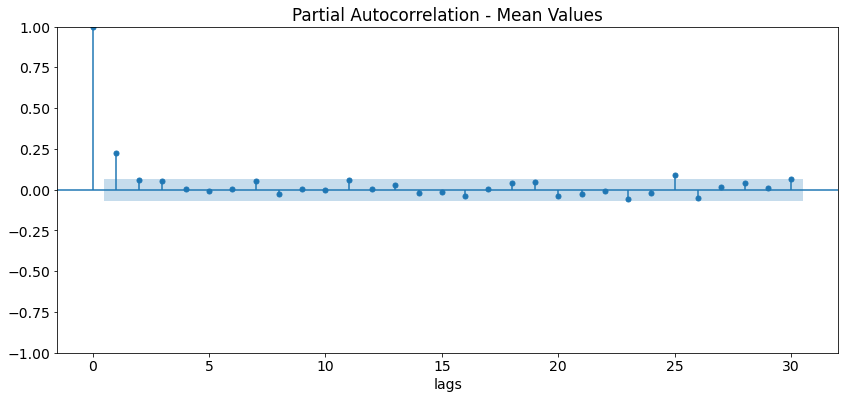

In [215]:
# plotting partial autocorrelation

plot_pacf(remainder_tem_mean_train['remainder'])
plt.xlabel('lags');
plt.title("Partial Autocorrelation - Mean Values")

Text(0.5, 1.0, 'Autocorrelation - Mean Values')

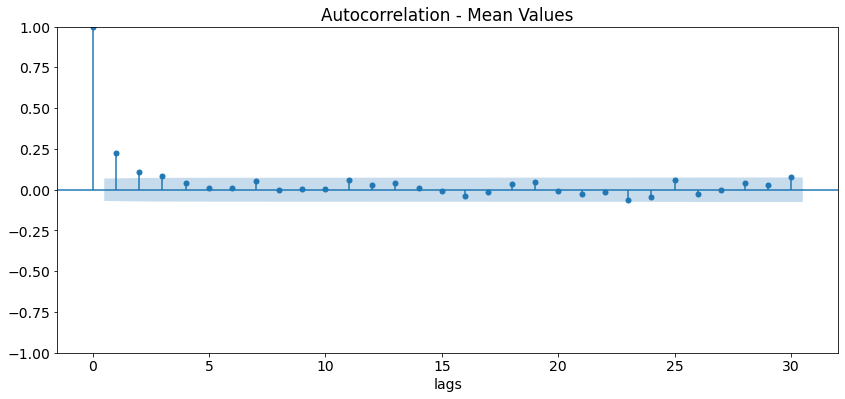

In [216]:
# plotting autocorrelation

plot_acf(remainder_tem_mean_train['remainder'])
plt.xlabel('lags');
plt.title("Autocorrelation - Mean Values")

In [219]:
order_mean = ar_select_order(remainder_tem_mean_train['remainder'], maxlag=10)
order_mean.ar_lags

/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


[1]

#### Min values

/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'Partial Autocorrelation - Min Values')

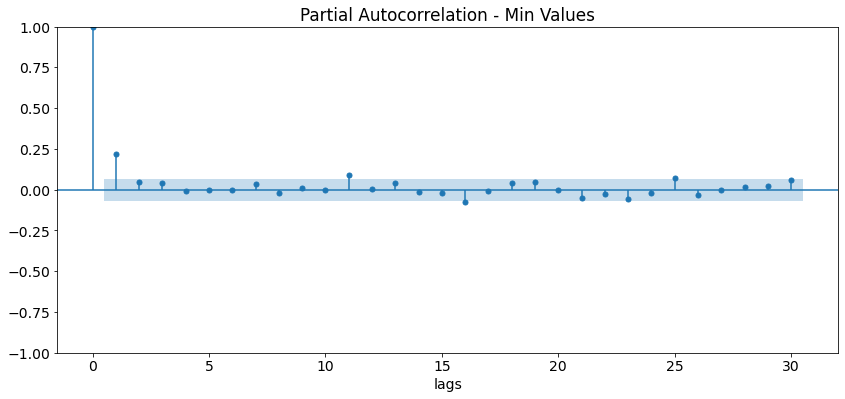

In [102]:
# plotting partial autocorrelation

plot_pacf(remainder_tem_min_train['remainder'])
plt.xlabel('lags');
plt.title("Partial Autocorrelation - Min Values")

Text(0.5, 1.0, 'Autocorrelation - Min Values')

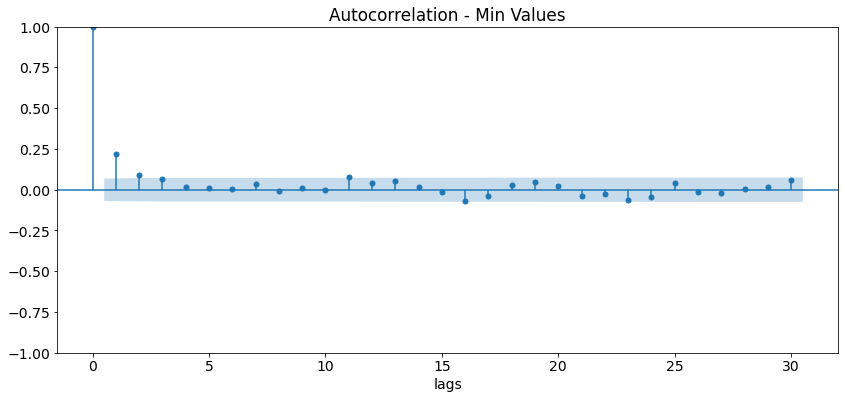

In [217]:
# plotting autocorrelation

plot_acf(remainder_tem_min_train['remainder'])
plt.xlabel('lags');
plt.title("Autocorrelation - Min Values")

In [220]:
order_min = ar_select_order(remainder_tem_min_train['remainder'], maxlag=10)
order_min.ar_lags

/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


[1]

#### Max values

/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'Partial Autocorrelation - Max Values')

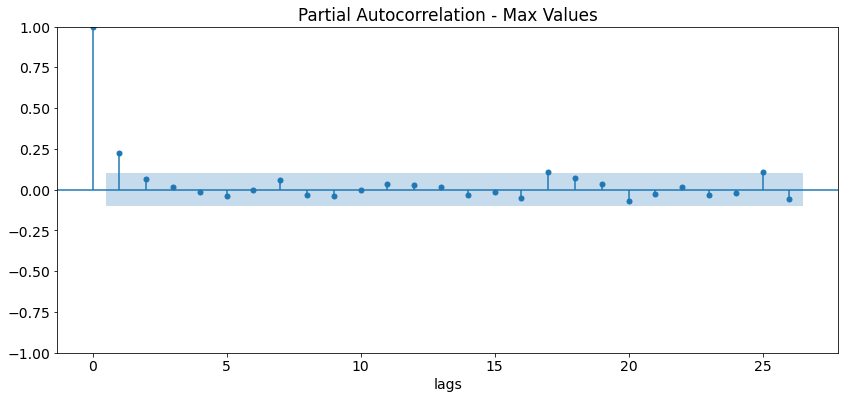

In [103]:
# plotting partial autocorrelation

plot_pacf(remainder_tem_max_train['remainder'])
plt.xlabel('lags');
plt.title("Partial Autocorrelation - Max Values")

Text(0.5, 1.0, 'Autocorrelation - Max Values')

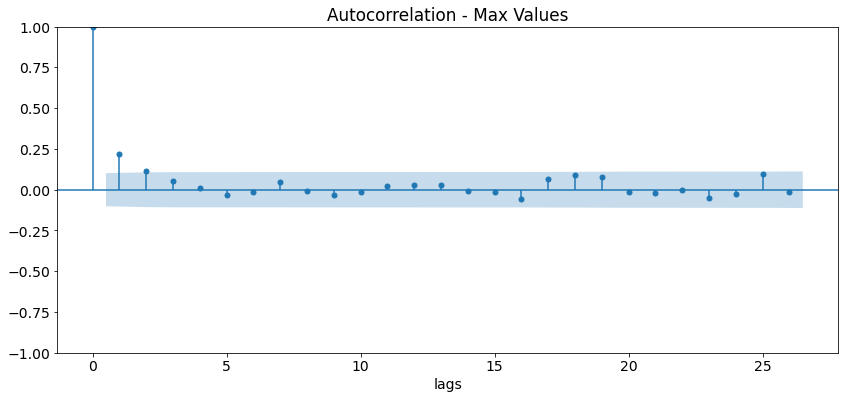

In [218]:
# plotting autocorrelation

plot_acf(remainder_tem_max_train['remainder'])
plt.xlabel('lags');
plt.title("Autocorrelation - Max Values")

In [221]:
order_max = ar_select_order(remainder_tem_max_train['remainder'], maxlag=10)
order_max.ar_lags

/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


[1]

# ARIMA

## Mean values

### ARIMA(1,1,1)

In [224]:
df_arima_mean = pd.DataFrame(index=remainder_tem_mean_train.index)
df_arima_mean['remainder'] = remainder_tem_mean_train['remainder']
df_arima_mean

remainder
index                
1950-02-01   2.648668
1950-03-01   1.783227
1950-04-01  -0.236626
1950-05-01   2.393227
1950-06-01   2.412639
...               ...
2017-08-01  -0.125727
2017-09-01  -1.286463
2017-10-01   1.200302
2017-11-01   0.338390
2017-12-01   1.351626

[815 rows x 1 columns]

In [225]:
# Fit an ARIMA model
arima_model_mean = ARIMA(df_arima_mean, order=(1,1,1)).fit() # order is (p,d,q) or (ar,i,ma)
arima_model_mean.summary()

/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              remainder   No. Observations:                  815
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1671.426
Date:                Fri, 26 Aug 2022   AIC                           3348.853
Time:                        11:59:18   BIC                           3362.959
Sample:                    02-01-1950   HQIC                          3354.267
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2262      0.032      6.998      0.000       0.163       0.290
ma.L1         -0.9997      0.043    -23.011      0.000      -1.085      -0.915
sigma2         3.5304      0.177     19.952      0.000       3.184       3.877
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):               109.02
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                            -0.53
Prob(H) (two-sided):                  0.76   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

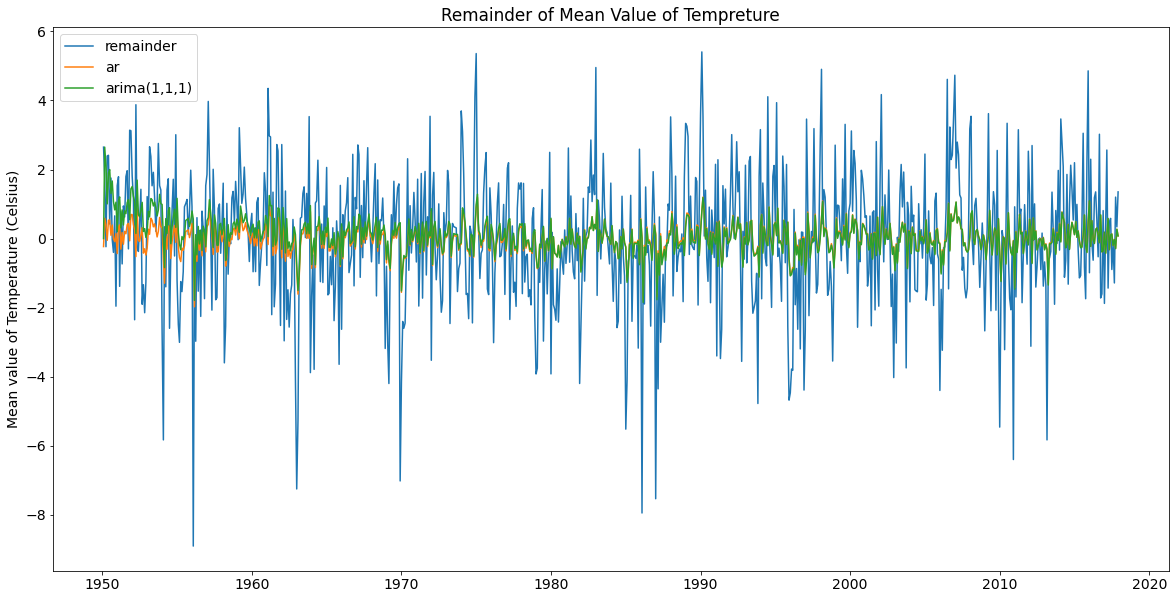

In [232]:
# Plot all time series
plt.rcParams['figure.figsize'] = (20,10)

plt.plot(remainder_tem_mean_train[['remainder']], label='remainder')
plt.plot(remainder_tem_mean_train[['predictions_ar1']], label='ar')
plt.plot(arima_model_mean.predict(), label='arima(1,1,1)')
plt.title("Remainder of Mean Value of Tempreture")
plt.ylabel("Mean value of Temperature (Celsius)")
plt.legend()
plt.show()

### ARIMA(1,2,1)

In [233]:
# Fit an ARIMA model
arima_model_mean2 = ARIMA(df_arima_mean, order=(1,2,1)).fit() # order is (p,d,q) or (ar,i,ma)
arima_model_mean2.summary()

/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              remainder   No. Observations:                  815
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -1788.266
Date:                Fri, 26 Aug 2022   AIC                           3582.532
Time:                        12:06:37   BIC                           3596.634
Sample:                    02-01-1950   HQIC                          3587.945
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4241      0.032    -13.288      0.000      -0.487      -0.362
ma.L1         -0.9997      0.284     -3.525      0.000      -1.556      -0.444
sigma2         4.7220      1.350      3.499      0.000       2.077       7.367
===================================================================================
Ljung-Box (L1) (Q):                  12.65   Jarque-Bera (JB):                65.26
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.45
Prob(H) (two-sided):                  1.00   Kurtosis:                         4.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

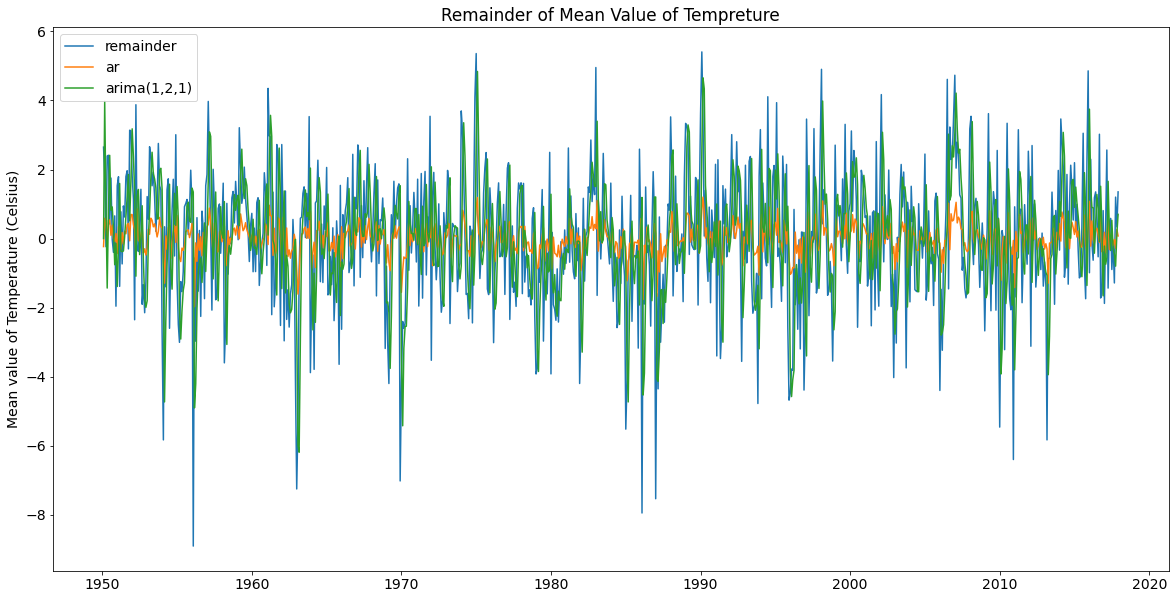

In [234]:
# Plot all time series
plt.rcParams['figure.figsize'] = (20,10)

plt.plot(remainder_tem_mean_train[['remainder']], label='remainder')
plt.plot(remainder_tem_mean_train[['predictions_ar1']], label='ar')
plt.plot(arima_model_mean2.predict(), label='arima(1,2,1)')
plt.title("Remainder of Mean Value of Tempreture")
plt.ylabel("Mean value of Temperature (Celsius)")
plt.legend()
plt.show()

### ARIMA(1,0,1)

In [235]:
# Fit an ARIMA model
arima_model_mean0 = ARIMA(df_arima_mean, order=(1,0,1)).fit() # order is (p,d,q) or (ar,i,ma)
arima_model_mean0.summary()

/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              remainder   No. Observations:                  815
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1667.651
Date:                Fri, 26 Aug 2022   AIC                           3343.303
Time:                        12:13:34   BIC                           3362.115
Sample:                    02-01-1950   HQIC                          3350.523
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0040      0.099      0.040      0.968      -0.191       0.199
ar.L1          0.5471      0.124      4.416      0.000       0.304       0.790
ma.L1         -0.3438      0.137     -2.512      0.012      -0.612      -0.076
sigma2         3.5059      0.138     25.414      0.000       3.235       3.776
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               119.95
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                            -0.56
Prob(H) (two-sided):                  0.78   Kurtosis:                         4.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

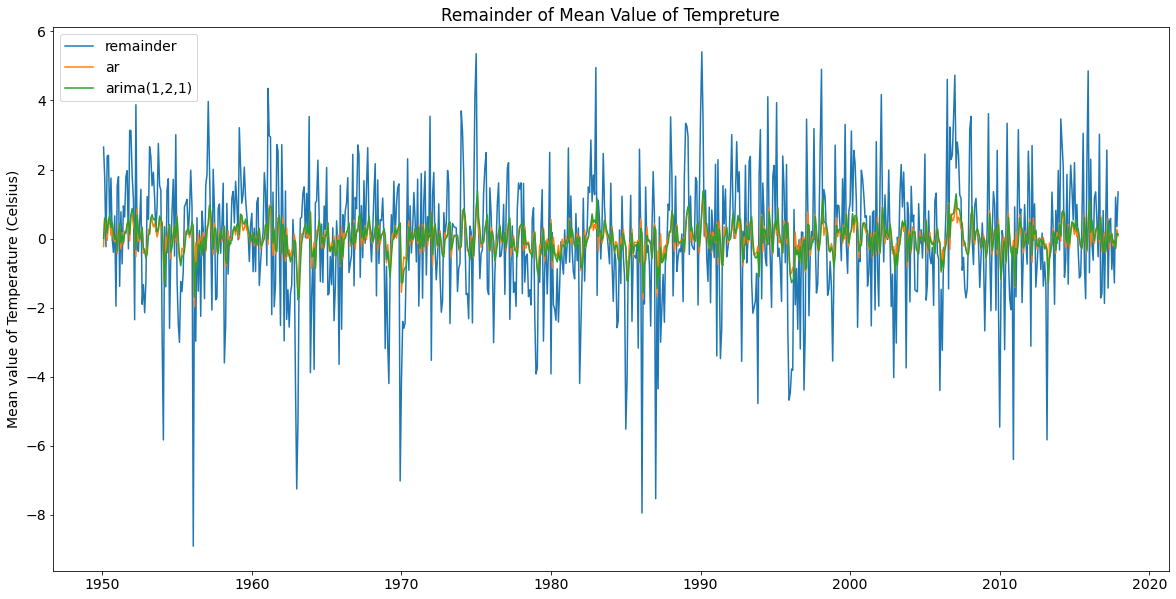

In [236]:
# Plot all time series
plt.rcParams['figure.figsize'] = (20,10)

plt.plot(remainder_tem_mean_train[['remainder']], label='remainder')
plt.plot(remainder_tem_mean_train[['predictions_ar1']], label='ar')
plt.plot(arima_model_mean0.predict(), label='arima(1,2,1)')
plt.title("Remainder of Mean Value of Tempreture")
plt.ylabel("Mean value of Temperature (Celsius)")
plt.legend()
plt.show()

## Min values

## Max values

# Modeling Autoregression with Seasonality, Trend and Remainder

## Checking train data

In [104]:
df_tem_mean_train.head()

year  month     TG  timestep      trend  month_2  month_3  \
index                                                                   
1950-01-01  1950      1  -1.80         0  12.874780        0        0   
1950-02-01  1950      2   2.72         1  12.874850        1        0   
1950-03-01  1950      3   5.30         2  12.874920        0        1   
1950-04-01  1950      4   7.95         3  12.874990        0        0   
1950-05-01  1950      5  15.57         4  12.875059        0        0   

            month_4  month_5  month_6  month_7  month_8  month_9  month_10  \
index                                                                        
1950-01-01        0        0        0        0        0        0         0   
1950-02-01        0        0        0        0        0        0         0   
1950-03-01        0        0        0        0        0        0         0   
1950-04-01        1        0        0        0        0        0         0   
1950-05-01        0        1        0        0        0        0         0   

            month_11  month_12  trend + seasonal  remainder  
index                                                        
1950-01-01         0         0         -0.749992  -1.050008  
1950-02-01         0         0          0.071332   2.648668  
1950-03-01         0         0          3.516773   1.783227  
1950-04-01         0         0          8.186626  -0.236626  
1950-05-01         0         0         13.176773   2.393227

In [105]:
df_tem_min_train.head()

year  month     TN  timestep      trend  month_2  month_3  \
index                                                                   
1950-01-01  1950      1  -4.99         0  12.874780        0        0   
1950-02-01  1950      2  -0.25         1  12.874850        1        0   
1950-03-01  1950      3   1.26         2  12.874920        0        1   
1950-04-01  1950      4   3.77         3  12.874990        0        0   
1950-05-01  1950      5  10.27         4  12.875059        0        0   

            month_4  month_5  month_6  month_7  month_8  month_9  month_10  \
index                                                                        
1950-01-01        0        0        0        0        0        0         0   
1950-02-01        0        0        0        0        0        0         0   
1950-03-01        0        0        0        0        0        0         0   
1950-04-01        1        0        0        0        0        0         0   
1950-05-01        0        1        0        0        0        0         0   

            month_11  month_12  trend + seasonal  remainder  
index                                                        
1950-01-01         0         0         -3.071730  -1.918270  
1950-02-01         0         0         -2.600407   2.350407  
1950-03-01         0         0          0.131652   1.128348  
1950-04-01         0         0          3.679446   0.090554  
1950-05-01         0         0          8.164888   2.105112

In [106]:
df_tem_max_train.head()

year  month     TX  timestep      trend  month_2  month_3  \
index                                                                   
1950-01-01  1950      1   1.15         0  12.874780        0        0   
1950-02-01  1950      2   5.79         1  12.874850        1        0   
1950-03-01  1950      3   9.31         2  12.874920        0        1   
1950-04-01  1950      4  12.38         3  12.874990        0        0   
1950-05-01  1950      5  20.79         4  12.875059        0        0   

            month_4  month_5  month_6  month_7  month_8  month_9  month_10  \
index                                                                        
1950-01-01        0        0        0        0        0        0         0   
1950-02-01        0        0        0        0        0        0         0   
1950-03-01        0        0        0        0        0        0         0   
1950-04-01        1        0        0        0        0        0         0   
1950-05-01        0        1        0        0        0        0         0   

            month_11  month_12  trend + seasonal  remainder  
index                                                        
1950-01-01         0         0          1.902959  -0.752959  
1950-02-01         0         0          3.307475   2.482525  
1950-03-01         0         0          7.638765   1.671235  
1950-04-01         0         0         12.939733  -0.559733  
1950-05-01         0         0         18.222314   2.567686

## Add the lags of the remainder to the training data

In [107]:
df_tem_mean_train['lag1'] = df_tem_mean_train['remainder'].shift(1)
df_tem_mean_train.dropna(inplace=True)
df_tem_mean_train.head()

year  month     TG  timestep      trend  month_2  month_3  \
index                                                                   
1950-02-01  1950      2   2.72         1  12.874850        1        0   
1950-03-01  1950      3   5.30         2  12.874920        0        1   
1950-04-01  1950      4   7.95         3  12.874990        0        0   
1950-05-01  1950      5  15.57         4  12.875059        0        0   
1950-06-01  1950      6  18.87         5  12.875129        0        0   

            month_4  month_5  month_6  month_7  month_8  month_9  month_10  \
index                                                                        
1950-02-01        0        0        0        0        0        0         0   
1950-03-01        0        0        0        0        0        0         0   
1950-04-01        1        0        0        0        0        0         0   
1950-05-01        0        1        0        0        0        0         0   
1950-06-01        0        0        1        0        0        0         0   

            month_11  month_12  trend + seasonal  remainder      lag1  
index                                                                  
1950-02-01         0         0          0.071332   2.648668 -1.050008  
1950-03-01         0         0          3.516773   1.783227  2.648668  
1950-04-01         0         0          8.186626  -0.236626  1.783227  
1950-05-01         0         0         13.176773   2.393227 -0.236626  
1950-06-01         0         0         16.457361   2.412639  2.393227

In [108]:
df_tem_min_train['lag1'] = df_tem_min_train['remainder'].shift(1)
df_tem_min_train.dropna(inplace=True)
df_tem_min_train.head()

year  month     TN  timestep      trend  month_2  month_3  \
index                                                                   
1950-02-01  1950      2  -0.25         1  12.874850        1        0   
1950-03-01  1950      3   1.26         2  12.874920        0        1   
1950-04-01  1950      4   3.77         3  12.874990        0        0   
1950-05-01  1950      5  10.27         4  12.875059        0        0   
1950-06-01  1950      6  13.29         5  12.875129        0        0   

            month_4  month_5  month_6  month_7  month_8  month_9  month_10  \
index                                                                        
1950-02-01        0        0        0        0        0        0         0   
1950-03-01        0        0        0        0        0        0         0   
1950-04-01        1        0        0        0        0        0         0   
1950-05-01        0        1        0        0        0        0         0   
1950-06-01        0        0        1        0        0        0         0   

            month_11  month_12  trend + seasonal  remainder      lag1  
index                                                                  
1950-02-01         0         0         -2.600407   2.350407 -1.918270  
1950-03-01         0         0          0.131652   1.128348  2.350407  
1950-04-01         0         0          3.679446   0.090554  1.128348  
1950-05-01         0         0          8.164888   2.105112  0.090554  
1950-06-01         0         0         11.647241   1.642759  2.105112

In [109]:
df_tem_max_train['lag1'] = df_tem_max_train['remainder'].shift(1)
df_tem_max_train.dropna(inplace=True)
df_tem_max_train.head()

year  month     TX  timestep      trend  month_2  month_3  \
index                                                                   
1950-02-01  1950      2   5.79         1  12.874850        1        0   
1950-03-01  1950      3   9.31         2  12.874920        0        1   
1950-04-01  1950      4  12.38         3  12.874990        0        0   
1950-05-01  1950      5  20.79         4  12.875059        0        0   
1950-06-01  1950      6  23.84         5  12.875129        0        0   

            month_4  month_5  month_6  month_7  month_8  month_9  month_10  \
index                                                                        
1950-02-01        0        0        0        0        0        0         0   
1950-03-01        0        0        0        0        0        0         0   
1950-04-01        1        0        0        0        0        0         0   
1950-05-01        0        1        0        0        0        0         0   
1950-06-01        0        0        1        0        0        0         0   

            month_11  month_12  trend + seasonal  remainder      lag1  
index                                                                  
1950-02-01         0         0          3.307475   2.482525 -0.752959  
1950-03-01         0         0          7.638765   1.671235  2.482525  
1950-04-01         0         0         12.939733  -0.559733  1.671235  
1950-05-01         0         0         18.222314   2.567686 -0.559733  
1950-06-01         0         0         22.268120   1.571880  2.567686

## Run the full model

### Assigning x and y

In [110]:
X_full_train_mean_tem = df_tem_mean_train.drop(columns = ["year", "month", "trend", "TG", "remainder", "trend + seasonal"])
y_full_train_mean_tem = df_tem_mean_train["TG"]
X_full_train_mean_tem.head()

timestep  month_2  month_3  month_4  month_5  month_6  month_7  \
index                                                                        
1950-02-01         1        1        0        0        0        0        0   
1950-03-01         2        0        1        0        0        0        0   
1950-04-01         3        0        0        1        0        0        0   
1950-05-01         4        0        0        0        1        0        0   
1950-06-01         5        0        0        0        0        1        0   

            month_8  month_9  month_10  month_11  month_12      lag1  
index                                                                 
1950-02-01        0        0         0         0         0 -1.050008  
1950-03-01        0        0         0         0         0  2.648668  
1950-04-01        0        0         0         0         0  1.783227  
1950-05-01        0        0         0         0         0 -0.236626  
1950-06-01        0        0         0         0         0  2.393227

In [111]:
X_full_train_min_tem = df_tem_min_train.drop(columns = ["year", "month", "trend", "TN", "remainder", "trend + seasonal"])
y_full_train_min_tem = df_tem_min_train["TN"]
X_full_train_min_tem.head()

timestep  month_2  month_3  month_4  month_5  month_6  month_7  \
index                                                                        
1950-02-01         1        1        0        0        0        0        0   
1950-03-01         2        0        1        0        0        0        0   
1950-04-01         3        0        0        1        0        0        0   
1950-05-01         4        0        0        0        1        0        0   
1950-06-01         5        0        0        0        0        1        0   

            month_8  month_9  month_10  month_11  month_12      lag1  
index                                                                 
1950-02-01        0        0         0         0         0 -1.918270  
1950-03-01        0        0         0         0         0  2.350407  
1950-04-01        0        0         0         0         0  1.128348  
1950-05-01        0        0         0         0         0  0.090554  
1950-06-01        0        0         0         0         0  2.105112

In [112]:
X_full_train_max_tem = df_tem_max_train.drop(columns = ["year", "month", "trend", "TX", "remainder", "trend + seasonal"])
y_full_train_max_tem = df_tem_max_train["TX"]
X_full_train_max_tem.head()

timestep  month_2  month_3  month_4  month_5  month_6  month_7  \
index                                                                        
1950-02-01         1        1        0        0        0        0        0   
1950-03-01         2        0        1        0        0        0        0   
1950-04-01         3        0        0        1        0        0        0   
1950-05-01         4        0        0        0        1        0        0   
1950-06-01         5        0        0        0        0        1        0   

            month_8  month_9  month_10  month_11  month_12      lag1  
index                                                                 
1950-02-01        0        0         0         0         0 -0.752959  
1950-03-01        0        0         0         0         0  2.482525  
1950-04-01        0        0         0         0         0  1.671235  
1950-05-01        0        0         0         0         0 -0.559733  
1950-06-01        0        0         0         0         0  2.567686

### Fitting the model

In [113]:
m_full = LinearRegression()

In [114]:
m_full.fit(X_full_train_mean_tem, y_full_train_mean_tem)
m_full.fit(X_full_train_min_tem, y_full_train_min_tem)
m_full.fit(X_full_train_max_tem, y_full_train_max_tem)

LinearRegression()

In [115]:
# Create a new predictions column
df_tem_mean_train['predictions_full_model'] = m_full.predict(X_full_train_mean_tem)
df_tem_min_train['predictions_full_model'] = m_full.predict(X_full_train_min_tem)
df_tem_max_train['predictions_full_model'] = m_full.predict(X_full_train_max_tem)

### Plot the prediction vs tempreture for the training data

Text(0.5, 0, 'Year')

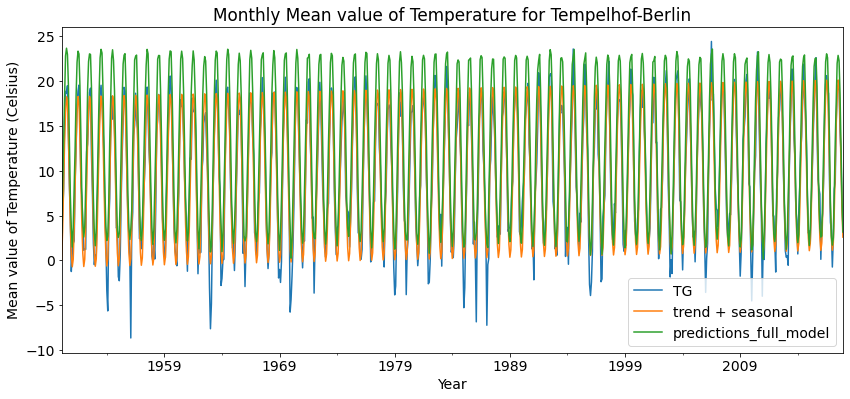

In [116]:
df_tem_mean_train[['TG', 'trend + seasonal', 'predictions_full_model']].plot()
plt.title('Monthly Mean value of Temperature for Tempelhof-Berlin')
plt.ylabel('Mean value of Temperature (Celsius)')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

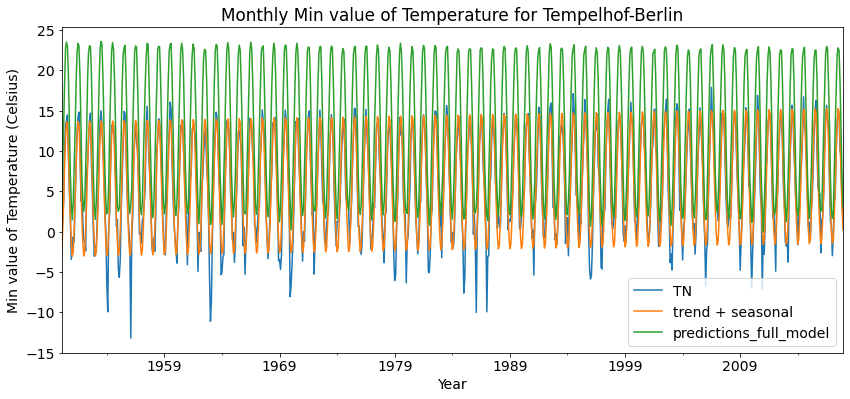

In [117]:
df_tem_min_train[['TN', 'trend + seasonal', 'predictions_full_model']].plot()
plt.title('Monthly Min value of Temperature for Tempelhof-Berlin')
plt.ylabel('Min value of Temperature (Celsius)')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

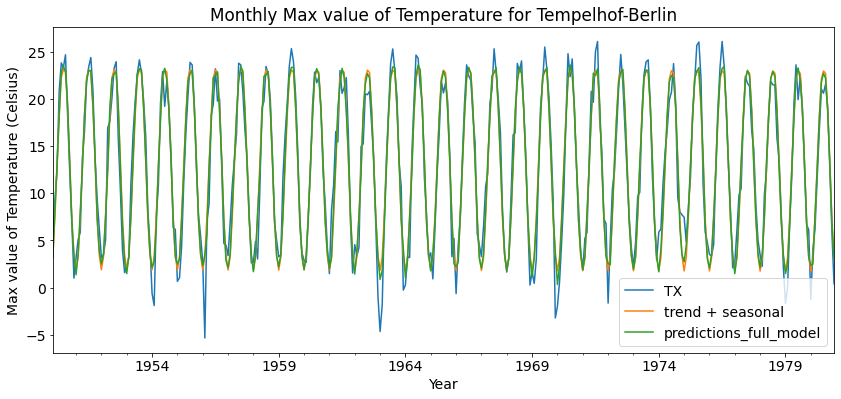

In [118]:
df_tem_max_train[['TX', 'trend + seasonal', 'predictions_full_model']].plot()
plt.title('Monthly Max value of Temperature for Tempelhof-Berlin')
plt.ylabel('Max value of Temperature (Celsius)')
plt.xlabel('Year')

## Evaluating the model for train data

In [119]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from statsmodels.tsa.ar_model import AutoReg

In [120]:
# Create a TimeSeriesSplit object
ts_split = TimeSeriesSplit(n_splits=5)

### Mean values

In [121]:
# Create the time series split
time_series_split_mean = ts_split.split(X_full_train_mean_tem, y_full_train_mean_tem)

In [122]:
# Do the cross validation: Remember these are the 'test scores' in the training data.
result_mean = cross_val_score(estimator=m_full, 
                         X=X_full_train_mean_tem, y=y_full_train_mean_tem,
                         cv=time_series_split_mean)
result_mean

array([0.92993158, 0.93391981, 0.90081834, 0.93102178, 0.92604109])

In [123]:
result_mean.mean()

0.9243465220169098

### Min values

In [124]:
# Create the time series split
time_series_split_min = ts_split.split(X_full_train_min_tem, y_full_train_min_tem)

In [125]:
# Do the cross validation: Remember these are the 'test scores' in the training data.
result_min = cross_val_score(estimator=m_full, 
                         X=X_full_train_min_tem, y=y_full_train_min_tem,
                         cv=time_series_split_min)
result_min

array([0.90770512, 0.91616644, 0.88549584, 0.92753831, 0.91325258])

In [126]:
result_min.mean()

0.9100316575263786

### Max values

In [127]:
# Create the time series split
time_series_split_max = ts_split.split(X_full_train_max_tem, y_full_train_max_tem)

In [128]:
# Do the cross validation: Remember these are the 'test scores' in the training data.
result_max = cross_val_score(estimator=m_full, 
                         X=X_full_train_max_tem, y=y_full_train_max_tem,
                         cv=time_series_split_max)
result_max

array([0.89178433, 0.91810141, 0.94219697, 0.90968514, 0.95049286])

In [129]:
result_max.mean()

0.9224521429269931

## Testing the model

### checking the test data

In [130]:
df_tem_mean_test.head()

TG
DATE           
2018-01-01  8.5
2018-01-02  4.6
2018-01-03  5.1
2018-01-04  6.8
2018-01-05  7.1

In [131]:
df_tem_min_test.head()

TN
DATE           
2018-01-01  4.1
2018-01-02  2.5
2018-01-03  2.1
2018-01-04  5.8
2018-01-05  4.2

In [132]:
df_tem_max_test1.head()

TX
DATE           
1981-01-01  6.4
1981-01-02  4.0
1981-01-03  8.6
1981-01-04  4.8
1981-01-05  0.8

In [133]:
df_tem_max_test2.head()

TX
DATE           
2009-01-01 -0.8
2009-01-02 -0.3
2009-01-03  0.3
2009-01-04  1.0
2009-01-05  0.0

### Grouping by year and month

In [134]:
df_tem_mean_test["month"] = df_tem_mean_test.index.month
df_tem_mean_test["year"] = df_tem_mean_test.index.year
df_tem_mean_test = round(df_tem_mean_test.groupby(["year","month"], as_index=False).mean(), 2)
df_tem_mean_test.head(20)

/tmp/ipykernel_188835/2808530424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_mean_test["month"] = df_tem_mean_test.index.month
/tmp/ipykernel_188835/2808530424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_mean_test["year"] = df_tem_mean_test.index.year


year  month     TG
0   2018      1   3.74
1   2018      2  -0.80
2   2018      3   1.99
3   2018      4  13.96
4   2018      5  18.04
5   2018      6  19.61
6   2018      7  22.10
7   2018      8  22.18
8   2018      9  17.14
9   2018     10  11.72
10  2018     11   5.74
11  2018     12   4.70
12  2019      1   1.73
13  2019      2   5.40

In [135]:
df_tem_min_test["month"] = df_tem_min_test.index.month
df_tem_min_test["year"] = df_tem_min_test.index.year
df_tem_min_test = round(df_tem_min_test.groupby(["year","month"], as_index=False).mean(), 2)
df_tem_min_test.head(20)

/tmp/ipykernel_188835/574635427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_min_test["month"] = df_tem_min_test.index.month
/tmp/ipykernel_188835/574635427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_min_test["year"] = df_tem_min_test.index.year


year  month     TN
0   2018      1   1.46
1   2018      2  -4.03
2   2018      3  -1.69
3   2018      4   8.00
4   2018      5  11.33
5   2018      6  14.56
6   2018      7  15.85
7   2018      8  16.16
8   2018      9  11.87
9   2018     10   6.76
10  2018     11   3.03
11  2018     12   2.69
12  2019      1  -0.50
13  2019      2   1.33

In [136]:
df_tem_max_test1["month"] = df_tem_max_test1.index.month
df_tem_max_test1["year"] = df_tem_max_test1.index.year
df_tem_max_test1 = round(df_tem_max_test1.groupby(["year","month"], as_index=False).mean(), 2)
df_tem_max_test1.head(20)

/tmp/ipykernel_188835/1659256956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_max_test1["month"] = df_tem_max_test1.index.month
/tmp/ipykernel_188835/1659256956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_max_test1["year"] = df_tem_max_test1.index.year


year  month     TX
0   1981      1   1.47
1   1981      2   3.37
2   1981      3  10.62
3   1981      4  13.15
4   1981      5  20.15
5   1981      6  21.48
6   1981      7  22.43
7   1981      8  21.73
8   1981      9  20.28
9   1981     10  12.46
10  1981     11   8.02
11  1981     12  -0.62
12  1982      1   0.67
13  1982      2   3.42
14  1982      3   9.94
15  1982      4  12.80
16  1982      5  19.14
17  1982      6  22.26
18  1982      7  25.95
19  1982      8  25.32

In [137]:
df_tem_max_test2["month"] = df_tem_max_test2.index.month
df_tem_max_test2["year"] = df_tem_max_test2.index.year
df_tem_max_test2 = round(df_tem_max_test2.groupby(["year","month"], as_index=False).mean(), 2)
df_tem_max_test2.head(20)

/tmp/ipykernel_188835/3382374586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_max_test2["month"] = df_tem_max_test2.index.month
/tmp/ipykernel_188835/3382374586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_max_test2["year"] = df_tem_max_test2.index.year


year  month     TX
0   2009      1   0.86
1   2009      2   3.04
2   2009      3   8.91
3   2009      4  19.57
4   2009      5  20.20
5   2009      6  20.73
6   2009      7  25.11
7   2009      8  26.51
8   2009      9  21.47
9   2009     10  11.46
10  2009     11  10.83
11  2009     12   2.40
12  2010      1  -2.68
13  2010      2   2.65
14  2010      3   9.53
15  2010      4  14.98
16  2010      5  15.17
17  2010      6  23.73
18  2010      7  28.90
19  2010      8  23.10

### Creating the index

In [138]:
df_tem_mean_test = date_index(df_tem_mean_test)
df_tem_mean_test.head()

year  month     TG
index                         
2018-01-01  2018      1   3.74
2018-02-01  2018      2  -0.80
2018-03-01  2018      3   1.99
2018-04-01  2018      4  13.96
2018-05-01  2018      5  18.04

In [139]:
df_tem_min_test = date_index(df_tem_min_test)
df_tem_min_test.head()

year  month     TN
index                         
2018-01-01  2018      1   1.46
2018-02-01  2018      2  -4.03
2018-03-01  2018      3  -1.69
2018-04-01  2018      4   8.00
2018-05-01  2018      5  11.33

In [140]:
df_tem_max_test1 = date_index(df_tem_max_test1)
df_tem_max_test1.head()

year  month     TX
index                         
1981-01-01  1981      1   1.47
1981-02-01  1981      2   3.37
1981-03-01  1981      3  10.62
1981-04-01  1981      4  13.15
1981-05-01  1981      5  20.15

In [141]:
df_tem_max_test2 = date_index(df_tem_max_test2)
df_tem_max_test2.head()

year  month     TX
index                         
2009-01-01  2009      1   0.86
2009-02-01  2009      2   3.04
2009-03-01  2009      3   8.91
2009-04-01  2009      4  19.57
2009-05-01  2009      5  20.20

### Getting last timestep of the training data and creating a timestep column

In [142]:
last_train_timestep_mean_tem = df_tem_mean_train['timestep'][-1]
last_train_timestep_min_tem = df_tem_min_train['timestep'][-1]
last_train_timestep_max_tem = df_tem_max_train['timestep'][-1]

In [143]:
df_tem_mean_test['timestep'] = list(range(last_train_timestep_mean_tem + 1, 
                            last_train_timestep_mean_tem + len(df_tem_mean_test) + 1))
df_tem_mean_test.head()

year  month     TG  timestep
index                                   
2018-01-01  2018      1   3.74       816
2018-02-01  2018      2  -0.80       817
2018-03-01  2018      3   1.99       818
2018-04-01  2018      4  13.96       819
2018-05-01  2018      5  18.04       820

In [144]:
df_tem_min_test['timestep'] = list(range(last_train_timestep_min_tem + 1, 
                            last_train_timestep_min_tem + len(df_tem_min_test) + 1))
df_tem_min_test.head()

year  month     TN  timestep
index                                   
2018-01-01  2018      1   1.46       816
2018-02-01  2018      2  -4.03       817
2018-03-01  2018      3  -1.69       818
2018-04-01  2018      4   8.00       819
2018-05-01  2018      5  11.33       820

In [145]:
df_tem_max_test1['timestep'] = list(range(last_train_timestep_max_tem + 1, 
                            last_train_timestep_max_tem + len(df_tem_max_test1) + 1))
df_tem_max_test1.head()

year  month     TX  timestep
index                                   
1981-01-01  1981      1   1.47       372
1981-02-01  1981      2   3.37       373
1981-03-01  1981      3  10.62       374
1981-04-01  1981      4  13.15       375
1981-05-01  1981      5  20.15       376

### Getting the trend - seasonal component of the test data

#### One hot encoding the month

In [146]:
seasonal_dummies_tem_mean_test = pd.get_dummies(df_tem_mean_test.index.month, 
                                  prefix='month', 
                                  drop_first=True).set_index(df_tem_mean_test.index)

df_tem_mean_test = df_tem_mean_test.join(seasonal_dummies_tem_mean_test)
df_tem_mean_test.head()

year  month     TG  timestep  month_2  month_3  month_4  month_5  \
index                                                                          
2018-01-01  2018      1   3.74       816        0        0        0        0   
2018-02-01  2018      2  -0.80       817        1        0        0        0   
2018-03-01  2018      3   1.99       818        0        1        0        0   
2018-04-01  2018      4  13.96       819        0        0        1        0   
2018-05-01  2018      5  18.04       820        0        0        0        1   

            month_6  month_7  month_8  month_9  month_10  month_11  month_12  
index                                                                         
2018-01-01        0        0        0        0         0         0         0  
2018-02-01        0        0        0        0         0         0         0  
2018-03-01        0        0        0        0         0         0         0  
2018-04-01        0        0        0        0         0         0         0  
2018-05-01        0        0        0        0         0         0         0

In [147]:
seasonal_dummies_tem_min_test = pd.get_dummies(df_tem_min_test.index.month, 
                                  prefix='month', 
                                  drop_first=True).set_index(df_tem_min_test.index)

df_tem_min_test = df_tem_min_test.join(seasonal_dummies_tem_min_test)
df_tem_min_test.head()

year  month     TN  timestep  month_2  month_3  month_4  month_5  \
index                                                                          
2018-01-01  2018      1   1.46       816        0        0        0        0   
2018-02-01  2018      2  -4.03       817        1        0        0        0   
2018-03-01  2018      3  -1.69       818        0        1        0        0   
2018-04-01  2018      4   8.00       819        0        0        1        0   
2018-05-01  2018      5  11.33       820        0        0        0        1   

            month_6  month_7  month_8  month_9  month_10  month_11  month_12  
index                                                                         
2018-01-01        0        0        0        0         0         0         0  
2018-02-01        0        0        0        0         0         0         0  
2018-03-01        0        0        0        0         0         0         0  
2018-04-01        0        0        0        0         0         0         0  
2018-05-01        0        0        0        0         0         0         0

In [148]:
seasonal_dummies_tem_max_test1 = pd.get_dummies(df_tem_max_test1.index.month, 
                                  prefix='month', 
                                  drop_first=True).set_index(df_tem_max_test1.index)

df_tem_max_test1 = df_tem_max_test1.join(seasonal_dummies_tem_max_test1)
df_tem_max_test1.head()

year  month     TX  timestep  month_2  month_3  month_4  month_5  \
index                                                                          
1981-01-01  1981      1   1.47       372        0        0        0        0   
1981-02-01  1981      2   3.37       373        1        0        0        0   
1981-03-01  1981      3  10.62       374        0        1        0        0   
1981-04-01  1981      4  13.15       375        0        0        1        0   
1981-05-01  1981      5  20.15       376        0        0        0        1   

            month_6  month_7  month_8  month_9  month_10  month_11  month_12  
index                                                                         
1981-01-01        0        0        0        0         0         0         0  
1981-02-01        0        0        0        0         0         0         0  
1981-03-01        0        0        0        0         0         0         0  
1981-04-01        0        0        0        0         0         0         0  
1981-05-01        0        0        0        0         0         0         0

#### Predicting the trend-seasonal column using the linearregression model (>> important : without fitting (test data)<<)

In [149]:
X_temp_mean_test = df_tem_mean_test.drop(columns=['TG', 'month', 'year'])
df_tem_mean_test['trend + seasonal'] = m_se_tr.predict(X_temp_mean_test)
df_tem_mean_test.head()

year  month     TG  timestep  month_2  month_3  month_4  month_5  \
index                                                                          
2018-01-01  2018      1   3.74       816        0        0        0        0   
2018-02-01  2018      2  -0.80       817        1        0        0        0   
2018-03-01  2018      3   1.99       818        0        1        0        0   
2018-04-01  2018      4  13.96       819        0        0        1        0   
2018-05-01  2018      5  18.04       820        0        0        0        1   

            month_6  month_7  month_8  month_9  month_10  month_11  month_12  \
index                                                                          
2018-01-01        0        0        0        0         0         0         0   
2018-02-01        0        0        0        0         0         0         0   
2018-03-01        0        0        0        0         0         0         0   
2018-04-01        0        0        0        0         0         0         0   
2018-05-01        0        0        0        0         0         0         0   

            trend + seasonal  
index                         
2018-01-01          1.548815  
2018-02-01          2.953331  
2018-03-01          7.284621  
2018-04-01         12.585589  
2018-05-01         17.868170

In [150]:
X_temp_min_test = df_tem_min_test.drop(columns=['TN', 'month', 'year'])
df_tem_min_test['trend + seasonal'] = m_se_tr.predict(X_temp_min_test)
df_tem_min_test.head()

year  month     TN  timestep  month_2  month_3  month_4  month_5  \
index                                                                          
2018-01-01  2018      1   1.46       816        0        0        0        0   
2018-02-01  2018      2  -4.03       817        1        0        0        0   
2018-03-01  2018      3  -1.69       818        0        1        0        0   
2018-04-01  2018      4   8.00       819        0        0        1        0   
2018-05-01  2018      5  11.33       820        0        0        0        1   

            month_6  month_7  month_8  month_9  month_10  month_11  month_12  \
index                                                                          
2018-01-01        0        0        0        0         0         0         0   
2018-02-01        0        0        0        0         0         0         0   
2018-03-01        0        0        0        0         0         0         0   
2018-04-01        0        0        0        0         0         0         0   
2018-05-01        0        0        0        0         0         0         0   

            trend + seasonal  
index                         
2018-01-01          1.548815  
2018-02-01          2.953331  
2018-03-01          7.284621  
2018-04-01         12.585589  
2018-05-01         17.868170

In [151]:
X_temp_max_test1 = df_tem_max_test1.drop(columns=['TX', 'month', 'year'])
df_tem_max_test1['trend + seasonal'] = m_se_tr.predict(X_temp_max_test1)
df_tem_max_test1.head()

year  month     TX  timestep  month_2  month_3  month_4  month_5  \
index                                                                          
1981-01-01  1981      1   1.47       372        0        0        0        0   
1981-02-01  1981      2   3.37       373        1        0        0        0   
1981-03-01  1981      3  10.62       374        0        1        0        0   
1981-04-01  1981      4  13.15       375        0        0        1        0   
1981-05-01  1981      5  20.15       376        0        0        0        1   

            month_6  month_7  month_8  month_9  month_10  month_11  month_12  \
index                                                                          
1981-01-01        0        0        0        0         0         0         0   
1981-02-01        0        0        0        0         0         0         0   
1981-03-01        0        0        0        0         0         0         0   
1981-04-01        0        0        0        0         0         0         0   
1981-05-01        0        0        0        0         0         0         0   

            trend + seasonal  
index                         
1981-01-01          1.741511  
1981-02-01          3.146027  
1981-03-01          7.477317  
1981-04-01         12.778285  
1981-05-01         18.060866

#### Plotting the results

(-5.0, 40.0)

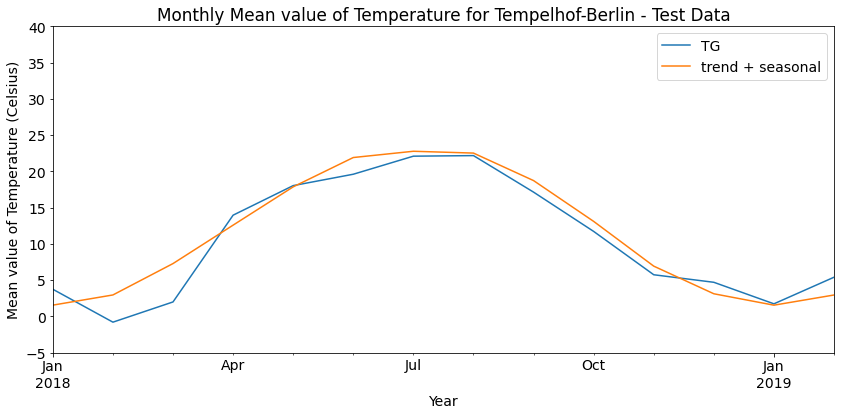

In [152]:
df_tem_mean_test[['TG', 'trend + seasonal']].plot()
plt.title('Monthly Mean value of Temperature for Tempelhof-Berlin - Test Data')
plt.ylabel('Mean value of Temperature (Celsius)')
plt.xlabel('Year')
plt.ylim(-5,40)

(-5.0, 40.0)

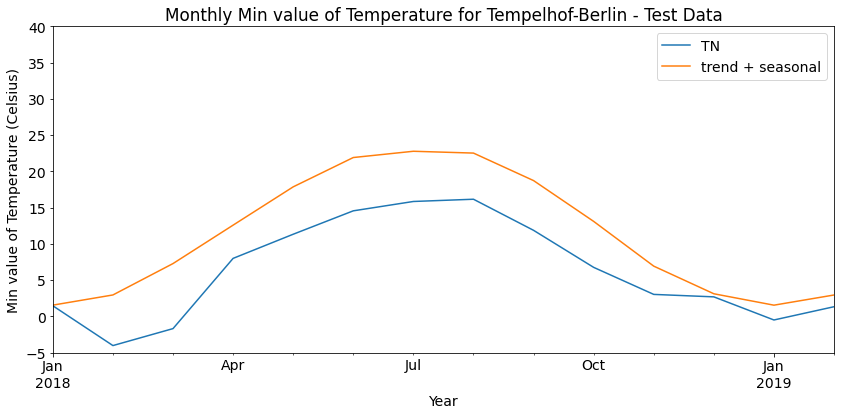

In [153]:
df_tem_min_test[['TN', 'trend + seasonal']].plot()
plt.title('Monthly Min value of Temperature for Tempelhof-Berlin - Test Data')
plt.ylabel('Min value of Temperature (Celsius)')
plt.xlabel('Year')
plt.ylim(-5,40)

(-5.0, 40.0)

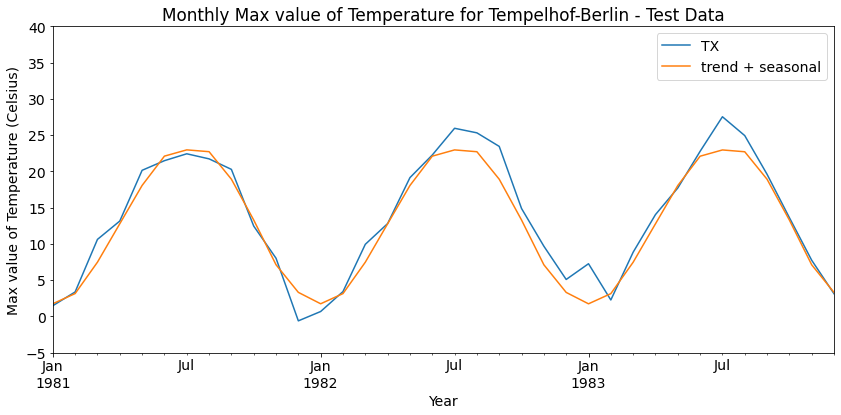

In [154]:
df_tem_max_test1[['TX', 'trend + seasonal']].plot()
plt.title('Monthly Max value of Temperature for Tempelhof-Berlin - Test Data')
plt.ylabel('Max value of Temperature (Celsius)')
plt.xlabel('Year')
plt.ylim(-5,40)

### Calculating the remainder and adding the lag1 for the test data

In [155]:
df_tem_mean_test['remainder'] = df_tem_mean_test['TG'] - df_tem_mean_test['trend + seasonal']
df_tem_mean_test['lag1'] = df_tem_mean_test['remainder'].shift(1)
df_tem_mean_test.head()

year  month     TG  timestep  month_2  month_3  month_4  month_5  \
index                                                                          
2018-01-01  2018      1   3.74       816        0        0        0        0   
2018-02-01  2018      2  -0.80       817        1        0        0        0   
2018-03-01  2018      3   1.99       818        0        1        0        0   
2018-04-01  2018      4  13.96       819        0        0        1        0   
2018-05-01  2018      5  18.04       820        0        0        0        1   

            month_6  month_7  month_8  month_9  month_10  month_11  month_12  \
index                                                                          
2018-01-01        0        0        0        0         0         0         0   
2018-02-01        0        0        0        0         0         0         0   
2018-03-01        0        0        0        0         0         0         0   
2018-04-01        0        0        0        0         0         0         0   
2018-05-01        0        0        0        0         0         0         0   

            trend + seasonal  remainder      lag1  
index                                              
2018-01-01          1.548815   2.191185       NaN  
2018-02-01          2.953331  -3.753331  2.191185  
2018-03-01          7.284621  -5.294621 -3.753331  
2018-04-01         12.585589   1.374411 -5.294621  
2018-05-01         17.868170   0.171830  1.374411

In [156]:
df_tem_mean_train.tail(1)

year  month    TG  timestep      trend  month_2  month_3  month_4  \
index                                                                           
2017-12-01  2017     12  3.94       815  12.931729        0        0        0   

            month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
index                                                                         
2017-12-01        0        0        0        0        0         0         0   

            month_12  trend + seasonal  remainder     lag1  \
index                                                        
2017-12-01         1          2.588374   1.351626  0.33839   

            predictions_full_model  
index                               
2017-12-01                3.158982

In [157]:
df_tem_mean_test.loc['2018-01-01', 'lag1'] = df_tem_mean_train.loc['2017-12-01', 'remainder']
df_tem_mean_test.head()

year  month     TG  timestep  month_2  month_3  month_4  month_5  \
index                                                                          
2018-01-01  2018      1   3.74       816        0        0        0        0   
2018-02-01  2018      2  -0.80       817        1        0        0        0   
2018-03-01  2018      3   1.99       818        0        1        0        0   
2018-04-01  2018      4  13.96       819        0        0        1        0   
2018-05-01  2018      5  18.04       820        0        0        0        1   

            month_6  month_7  month_8  month_9  month_10  month_11  month_12  \
index                                                                          
2018-01-01        0        0        0        0         0         0         0   
2018-02-01        0        0        0        0         0         0         0   
2018-03-01        0        0        0        0         0         0         0   
2018-04-01        0        0        0        0         0         0         0   
2018-05-01        0        0        0        0         0         0         0   

            trend + seasonal  remainder      lag1  
index                                              
2018-01-01          1.548815   2.191185  1.351626  
2018-02-01          2.953331  -3.753331  2.191185  
2018-03-01          7.284621  -5.294621 -3.753331  
2018-04-01         12.585589   1.374411 -5.294621  
2018-05-01         17.868170   0.171830  1.374411

In [158]:
df_tem_min_test['remainder'] = df_tem_min_test['TN'] - df_tem_min_test['trend + seasonal']
df_tem_min_test['lag1'] = df_tem_min_test['remainder'].shift(1)
df_tem_min_test.head()

year  month     TN  timestep  month_2  month_3  month_4  month_5  \
index                                                                          
2018-01-01  2018      1   1.46       816        0        0        0        0   
2018-02-01  2018      2  -4.03       817        1        0        0        0   
2018-03-01  2018      3  -1.69       818        0        1        0        0   
2018-04-01  2018      4   8.00       819        0        0        1        0   
2018-05-01  2018      5  11.33       820        0        0        0        1   

            month_6  month_7  month_8  month_9  month_10  month_11  month_12  \
index                                                                          
2018-01-01        0        0        0        0         0         0         0   
2018-02-01        0        0        0        0         0         0         0   
2018-03-01        0        0        0        0         0         0         0   
2018-04-01        0        0        0        0         0         0         0   
2018-05-01        0        0        0        0         0         0         0   

            trend + seasonal  remainder      lag1  
index                                              
2018-01-01          1.548815  -0.088815       NaN  
2018-02-01          2.953331  -6.983331 -0.088815  
2018-03-01          7.284621  -8.974621 -6.983331  
2018-04-01         12.585589  -4.585589 -8.974621  
2018-05-01         17.868170  -6.538170 -4.585589

In [159]:
df_tem_min_train.tail(1)

year  month    TN  timestep      trend  month_2  month_3  month_4  \
index                                                                           
2017-12-01  2017     12  1.67       815  12.931729        0        0        0   

            month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
index                                                                         
2017-12-01        0        0        0        0        0         0         0   

            month_12  trend + seasonal  remainder      lag1  \
index                                                         
2017-12-01         1          0.238642   1.431358  0.345476   

            predictions_full_model  
index                               
2017-12-01                3.160554

In [160]:
df_tem_min_test.loc['2018-01-01', 'lag1'] = df_tem_min_train.loc['2017-12-01', 'remainder']
df_tem_min_test.head()

year  month     TN  timestep  month_2  month_3  month_4  month_5  \
index                                                                          
2018-01-01  2018      1   1.46       816        0        0        0        0   
2018-02-01  2018      2  -4.03       817        1        0        0        0   
2018-03-01  2018      3  -1.69       818        0        1        0        0   
2018-04-01  2018      4   8.00       819        0        0        1        0   
2018-05-01  2018      5  11.33       820        0        0        0        1   

            month_6  month_7  month_8  month_9  month_10  month_11  month_12  \
index                                                                          
2018-01-01        0        0        0        0         0         0         0   
2018-02-01        0        0        0        0         0         0         0   
2018-03-01        0        0        0        0         0         0         0   
2018-04-01        0        0        0        0         0         0         0   
2018-05-01        0        0        0        0         0         0         0   

            trend + seasonal  remainder      lag1  
index                                              
2018-01-01          1.548815  -0.088815  1.431358  
2018-02-01          2.953331  -6.983331 -0.088815  
2018-03-01          7.284621  -8.974621 -6.983331  
2018-04-01         12.585589  -4.585589 -8.974621  
2018-05-01         17.868170  -6.538170 -4.585589

In [161]:
df_tem_max_test1['remainder'] = df_tem_max_test1['TX'] - df_tem_max_test1['trend + seasonal']
df_tem_max_test1['lag1'] = df_tem_max_test1['remainder'].shift(1)
df_tem_max_test1.head()

year  month     TX  timestep  month_2  month_3  month_4  month_5  \
index                                                                          
1981-01-01  1981      1   1.47       372        0        0        0        0   
1981-02-01  1981      2   3.37       373        1        0        0        0   
1981-03-01  1981      3  10.62       374        0        1        0        0   
1981-04-01  1981      4  13.15       375        0        0        1        0   
1981-05-01  1981      5  20.15       376        0        0        0        1   

            month_6  month_7  month_8  month_9  month_10  month_11  month_12  \
index                                                                          
1981-01-01        0        0        0        0         0         0         0   
1981-02-01        0        0        0        0         0         0         0   
1981-03-01        0        0        0        0         0         0         0   
1981-04-01        0        0        0        0         0         0         0   
1981-05-01        0        0        0        0         0         0         0   

            trend + seasonal  remainder      lag1  
index                                              
1981-01-01          1.741511  -0.271511       NaN  
1981-02-01          3.146027   0.223973 -0.271511  
1981-03-01          7.477317   3.142683  0.223973  
1981-04-01         12.778285   0.371715  3.142683  
1981-05-01         18.060866   2.089134  0.371715

In [162]:
df_tem_max_train.tail(1)

year  month   TX  timestep      trend  month_2  month_3  month_4  \
index                                                                          
1980-12-01  1980     12  0.4       371  12.900704        0        0        0   

            month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
index                                                                         
1980-12-01        0        0        0        0        0         0         0   

            month_12  trend + seasonal  remainder      lag1  \
index                                                         
1980-12-01         1          3.314783  -2.914783 -1.256719   

            predictions_full_model  
index                               
1980-12-01                3.024827

In [163]:
df_tem_max_test1.loc['1981-01-01', 'lag1'] = df_tem_max_train.loc['1980-12-01', 'remainder']
df_tem_max_test1.head()

year  month     TX  timestep  month_2  month_3  month_4  month_5  \
index                                                                          
1981-01-01  1981      1   1.47       372        0        0        0        0   
1981-02-01  1981      2   3.37       373        1        0        0        0   
1981-03-01  1981      3  10.62       374        0        1        0        0   
1981-04-01  1981      4  13.15       375        0        0        1        0   
1981-05-01  1981      5  20.15       376        0        0        0        1   

            month_6  month_7  month_8  month_9  month_10  month_11  month_12  \
index                                                                          
1981-01-01        0        0        0        0         0         0         0   
1981-02-01        0        0        0        0         0         0         0   
1981-03-01        0        0        0        0         0         0         0   
1981-04-01        0        0        0        0         0         0         0   
1981-05-01        0        0        0        0         0         0         0   

            trend + seasonal  remainder      lag1  
index                                              
1981-01-01          1.741511  -0.271511 -2.914783  
1981-02-01          3.146027   0.223973 -0.271511  
1981-03-01          7.477317   3.142683  0.223973  
1981-04-01         12.778285   0.371715  3.142683  
1981-05-01         18.060866   2.089134  0.371715

### Predicting the tempreture using the linearregression model (>> important : without fitting (test data)<<)

In [164]:
# Assign X_full and make prediction

X_full_test_mean_tem = df_tem_mean_test.drop(columns=['TG','month', 'year', 'trend + seasonal', 'remainder'])
df_tem_mean_test['predictions_full_model'] = m_full.predict(X_full_test_mean_tem)

In [165]:
X_full_test_min_tem = df_tem_min_test.drop(columns=['TN','month', 'year', 'trend + seasonal', 'remainder'])
df_tem_min_test['predictions_full_model'] = m_full.predict(X_full_test_min_tem)

In [166]:
X_full_test_max_tem = df_tem_max_test1.drop(columns=['TX','month', 'year', 'trend + seasonal', 'remainder'])
df_tem_max_test1['predictions_full_model'] = m_full.predict(X_full_test_max_tem)

### Plotting the results

Text(0.5, 0, 'Year')

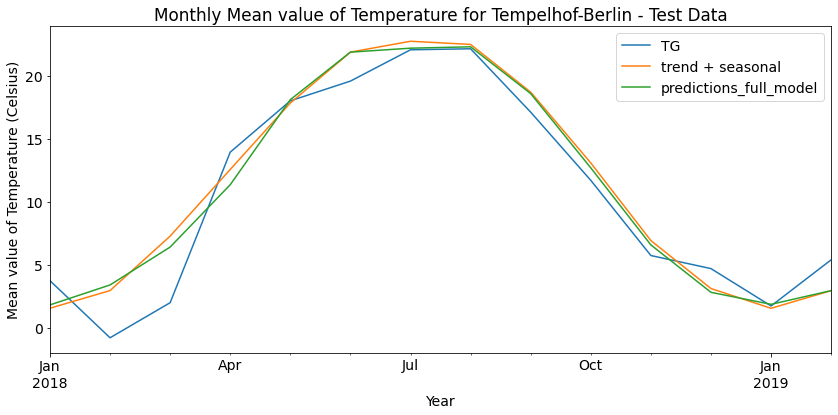

In [167]:
df_tem_mean_test[['TG', 'trend + seasonal', 'predictions_full_model']].plot()
plt.title('Monthly Mean value of Temperature for Tempelhof-Berlin - Test Data')
plt.ylabel('Mean value of Temperature (Celsius)')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

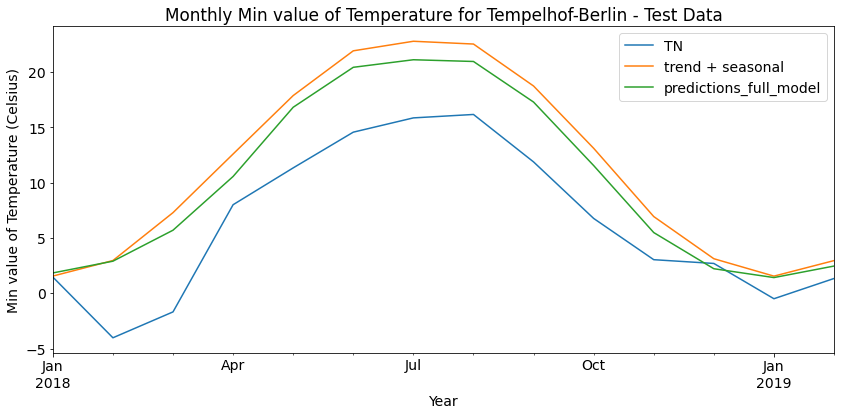

In [168]:
df_tem_min_test[['TN', 'trend + seasonal', 'predictions_full_model']].plot()
plt.title('Monthly Min value of Temperature for Tempelhof-Berlin - Test Data')
plt.ylabel('Min value of Temperature (Celsius)')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

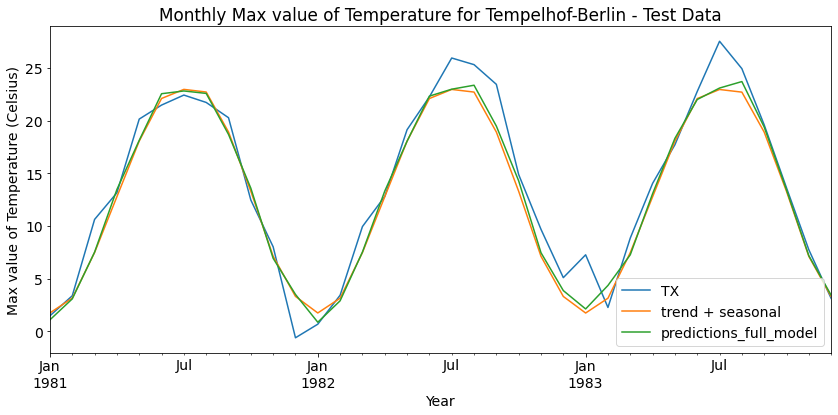

In [169]:
df_tem_max_test1[['TX', 'trend + seasonal', 'predictions_full_model']].plot()
plt.title('Monthly Max value of Temperature for Tempelhof-Berlin - Test Data')
plt.ylabel('Max value of Temperature (Celsius)')
plt.xlabel('Year')

#### Plotting the full data (train + test) and predictions

In [ ]:
# Create the complete dataset and plot it
df_tem_mean_full = df_tem_mean_train[['TG', 'trend + seasonal', 'predictions_full_model']].append(df_tem_mean_test[['TG', 'trend + seasonal', 'predictions_full_model']])
df_tem_mean_full[['TG', 'trend + seasonal', 'predictions_full_model']].plot()
plt.title('Monthly Mean value of Temperature for Tempelhof-Berlin - Test Data')
plt.ylabel('Mean value of Temperature (Celsius)')
plt.xlabel('Year')

In [ ]:
# Create the complete dataset and plot it
df_tem_min_full = df_tem_min_train[['TN', 'trend + seasonal', 'predictions_full_model']].append(df_tem_min_test[['TN', 'trend + seasonal', 'predictions_full_model']])
df_tem_min_full[['TN', 'trend + seasonal', 'predictions_full_model']].plot()
plt.title('Monthly Min value of Temperature for Tempelhof-Berlin - Test Data')
plt.ylabel('Min value of Temperature (Celsius)')
plt.xlabel('Year')

In [ ]:
# Create the complete dataset and plot it
df_tem_max_full = df_tem_max_train[['TX', 'trend + seasonal', 'predictions_full_model']].append(df_tem_max_test1[['TX', 'trend + seasonal', 'predictions_full_model']])
df_tem_max_full[['TX', 'trend + seasonal', 'predictions_full_model']].plot()
plt.title('Monthly Max value of Temperature for Tempelhof-Berlin - Test Data')
plt.ylabel('Max value of Temperature (Celsius)')
plt.xlabel('Year')

# Predicting the future

## Combining test-train data and fitting the model

In [170]:
# Combine train and test data
df_tem_mean_combined = df_tem_mean_train.append(df_tem_mean_test)
df_tem_mean_combined.head()

/tmp/ipykernel_188835/2168436587.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tem_mean_combined = df_tem_mean_train.append(df_tem_mean_test)


year  month     TG  timestep      trend  month_2  month_3  \
index                                                                   
1950-02-01  1950      2   2.72         1  12.874850        1        0   
1950-03-01  1950      3   5.30         2  12.874920        0        1   
1950-04-01  1950      4   7.95         3  12.874990        0        0   
1950-05-01  1950      5  15.57         4  12.875059        0        0   
1950-06-01  1950      6  18.87         5  12.875129        0        0   

            month_4  month_5  month_6  month_7  month_8  month_9  month_10  \
index                                                                        
1950-02-01        0        0        0        0        0        0         0   
1950-03-01        0        0        0        0        0        0         0   
1950-04-01        1        0        0        0        0        0         0   
1950-05-01        0        1        0        0        0        0         0   
1950-06-01        0        0        1        0        0        0         0   

            month_11  month_12  trend + seasonal  remainder      lag1  \
index                                                                   
1950-02-01         0         0          0.071332   2.648668 -1.050008   
1950-03-01         0         0          3.516773   1.783227  2.648668   
1950-04-01         0         0          8.186626  -0.236626  1.783227   
1950-05-01         0         0         13.176773   2.393227 -0.236626   
1950-06-01         0         0         16.457361   2.412639  2.393227   

            predictions_full_model  
index                               
1950-02-01                3.085444  
1950-03-01                8.237670  
1950-04-01               13.346550  
1950-05-01               18.180816  
1950-06-01               22.810329

In [171]:
# Combine train and test data
df_tem_min_combined = df_tem_min_train.append(df_tem_min_test)
df_tem_min_combined.head()

/tmp/ipykernel_188835/2807613525.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tem_min_combined = df_tem_min_train.append(df_tem_min_test)


year  month     TN  timestep      trend  month_2  month_3  \
index                                                                   
1950-02-01  1950      2  -0.25         1  12.874850        1        0   
1950-03-01  1950      3   1.26         2  12.874920        0        1   
1950-04-01  1950      4   3.77         3  12.874990        0        0   
1950-05-01  1950      5  10.27         4  12.875059        0        0   
1950-06-01  1950      6  13.29         5  12.875129        0        0   

            month_4  month_5  month_6  month_7  month_8  month_9  month_10  \
index                                                                        
1950-02-01        0        0        0        0        0        0         0   
1950-03-01        0        0        0        0        0        0         0   
1950-04-01        1        0        0        0        0        0         0   
1950-05-01        0        1        0        0        0        0         0   
1950-06-01        0        0        1        0        0        0         0   

            month_11  month_12  trend + seasonal  remainder      lag1  \
index                                                                   
1950-02-01         0         0         -2.600407   2.350407 -1.918270   
1950-03-01         0         0          0.131652   1.128348  2.350407   
1950-04-01         0         0          3.679446   0.090554  1.128348   
1950-05-01         0         0          8.164888   2.105112  0.090554   
1950-06-01         0         0         11.647241   1.642759  2.105112   

            predictions_full_model  
index                               
1950-02-01                2.892730  
1950-03-01                8.171470  
1950-04-01               13.201197  
1950-05-01               18.253435  
1950-06-01               22.746381

In [172]:
# Combine train and test data
df_tem_max_combined = df_tem_max_train.append(df_tem_max_test1)
df_tem_max_combined.head()

/tmp/ipykernel_188835/2231367195.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tem_max_combined = df_tem_max_train.append(df_tem_max_test1)


year  month     TX  timestep      trend  month_2  month_3  \
index                                                                   
1950-02-01  1950      2   5.79         1  12.874850        1        0   
1950-03-01  1950      3   9.31         2  12.874920        0        1   
1950-04-01  1950      4  12.38         3  12.874990        0        0   
1950-05-01  1950      5  20.79         4  12.875059        0        0   
1950-06-01  1950      6  23.84         5  12.875129        0        0   

            month_4  month_5  month_6  month_7  month_8  month_9  month_10  \
index                                                                        
1950-02-01        0        0        0        0        0        0         0   
1950-03-01        0        0        0        0        0        0         0   
1950-04-01        1        0        0        0        0        0         0   
1950-05-01        0        1        0        0        0        0         0   
1950-06-01        0        0        1        0        0        0         0   

            month_11  month_12  trend + seasonal  remainder      lag1  \
index                                                                   
1950-02-01         0         0          3.307475   2.482525 -0.752959   
1950-03-01         0         0          7.638765   1.671235  2.482525   
1950-04-01         0         0         12.939733  -0.559733  1.671235   
1950-05-01         0         0         18.222314   2.567686 -0.559733   
1950-06-01         0         0         22.268120   1.571880  2.567686   

            predictions_full_model  
index                               
1950-02-01                3.151376  
1950-03-01                8.200794  
1950-04-01               13.321693  
1950-05-01               18.109102  
1950-06-01               22.849051

In [173]:
# Re-train the model on the whole dataset - Mean
X_tem_mean_combined = df_tem_mean_combined.drop(columns=['TG','year','month', 'trend', 'trend + seasonal', 'remainder', 'predictions_full_model'])
y_tem_mean_combined = df_tem_mean_combined['TG']

In [174]:
# Re-train the model on the whole dataset - Min
X_tem_min_combined = df_tem_min_combined.drop(columns=['TN','year','month', 'trend', 'trend + seasonal', 'remainder', 'predictions_full_model'])
y_tem_min_combined = df_tem_min_combined['TN']

In [175]:
# Re-train the model on the whole dataset - Max
X_tem_max_combined = df_tem_max_combined.drop(columns=['TX','year','month', 'trend', 'trend + seasonal', 'remainder', 'predictions_full_model'])
y_tem_max_combined = df_tem_max_combined['TX']

In [176]:
m_combined = LinearRegression()
m_combined.fit(X_tem_mean_combined, y_tem_mean_combined)
m_combined.fit(X_tem_min_combined, y_tem_min_combined)
m_combined.fit(X_tem_max_combined, y_tem_max_combined)

LinearRegression()

## creating a single future step data and predicting the tempreture

### Mean values

In [177]:
# What is the first date in the future? 2019-03-01
df_tem_mean_combined.tail(1)

year  month   TG  timestep  trend  month_2  month_3  month_4  \
index                                                                      
2019-02-01  2019      2  5.4       829    NaN        1        0        0   

            month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
index                                                                         
2019-02-01        0        0        0        0        0         0         0   

            month_12  trend + seasonal  remainder      lag1  \
index                                                         
2019-02-01         0          2.948123   2.451877  0.186393   

            predictions_full_model  
index                               
2019-02-01                2.949811

In [178]:
timestep_mean = df_tem_mean_combined['timestep'].max() + 1
months_mean = [0] * 11
lag_mean = df_tem_mean_combined.loc['2019-02-01', 'remainder']

In [179]:
timestep_mean, months_mean, lag_mean

(830, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 2.4518770161281287)

In [180]:
X_future_mean = [timestep_mean]

X_future_mean

[830]

In [181]:
X_future_mean.extend(months_mean)
X_future_mean.append(lag_mean)
X_future_mean

[830, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.4518770161281287]

In [182]:
X_future_mean = pd.DataFrame([X_future_mean])
X_future_mean.columns = X_tem_mean_combined.columns

X_future_mean

timestep  month_2  month_3  month_4  month_5  month_6  month_7  month_8  \
0       830        0        0        0        0        0        0        0   

   month_9  month_10  month_11  month_12      lag1  
0        0         0         0         0  2.451877

In [183]:
m_combined.predict(X_future_mean)

array([2.83918828])

### Min values

In [184]:
# What is the first date in the future? 2019-03-01
df_tem_min_combined.tail(1)

year  month    TN  timestep  trend  month_2  month_3  month_4  \
index                                                                       
2019-02-01  2019      2  1.33       829    NaN        1        0        0   

            month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
index                                                                         
2019-02-01        0        0        0        0        0         0         0   

            month_12  trend + seasonal  remainder      lag1  \
index                                                         
2019-02-01         0          2.948123  -1.618123 -2.043607   

            predictions_full_model  
index                               
2019-02-01                2.454854

In [185]:
timestep_min = df_tem_min_combined['timestep'].max() + 1
months_min = [0] * 11
lag_min = df_tem_min_combined.loc['2019-02-01', 'remainder']

In [186]:
timestep_min, months_min, lag_min

(830, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], -1.6181229838718716)

In [187]:
X_future_min = [timestep_min]

X_future_min

[830]

In [188]:
X_future_min.extend(months_min)
X_future_min.append(lag_min)
X_future_min

[830, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1.6181229838718716]

In [189]:
X_future_min = pd.DataFrame([X_future_min])
X_future_min.columns = X_tem_min_combined.columns

X_future_min

timestep  month_2  month_3  month_4  month_5  month_6  month_7  month_8  \
0       830        0        0        0        0        0        0        0   

   month_9  month_10  month_11  month_12      lag1  
0        0         0         0         0 -1.618123

In [190]:
m_combined.predict(X_future_min)

array([1.90122501])

### Max values

In [191]:
# What is the first date in the future? 1984-01-01
df_tem_max_combined.tail(1)

year  month    TX  timestep  trend  month_2  month_3  month_4  \
index                                                                       
1983-12-01  1983     12  3.12       407    NaN        0        0        0   

            month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
index                                                                         
1983-12-01        0        0        0        0        0         0         0   

            month_12  trend + seasonal  remainder      lag1  \
index                                                         
1983-12-01         1          3.299159  -0.179159  0.628905   

            predictions_full_model  
index                               
1983-12-01                 3.42552

In [192]:
timestep_max = df_tem_max_combined['timestep'].max() + 1
months_max = [0] * 11
lag_max = df_tem_max_combined.loc['1983-12-01', 'remainder']

In [193]:
timestep_max, months_max, lag_max

(408, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], -0.17915927419386435)

In [194]:
X_future_max = [timestep_max]

X_future_max

[408]

In [195]:
X_future_max.extend(months_max)
X_future_max.append(lag_max)
X_future_max

[408, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.17915927419386435]

In [196]:
X_future_max = pd.DataFrame([X_future_max])
X_future_max.columns = X_tem_max_combined.columns

X_future_max

timestep  month_2  month_3  month_4  month_5  month_6  month_7  month_8  \
0       408        0        0        0        0        0        0        0   

   month_9  month_10  month_11  month_12      lag1  
0        0         0         0         0 -0.179159

In [197]:
m_combined.predict(X_future_max)

array([2.03403403])

# Augmented Dickey-Fuller Test on the Remainder

In [198]:
import statsmodels
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa import stattools

In [199]:
def print_adf(data):
    
    """ Prints the results of the augmented Dickey Fuller Test"""
    
    adf_stats, p, used_lag, n_obs, levels, information_criterion = \
            statsmodels.tsa.stattools.adfuller(data)
    
    print(f"""   
            adf: {round(adf_stats,2)}
            p: {p} 
            used lag: {used_lag} 
            number of observations: {n_obs}
            {round(levels['1%'],2)} (p=0.01; CI=99%) 
            {round(levels['5%'],2)} (p=0.05; CI=95%)
            {round(levels['10%'],2)} (p=0.1 CI=90%) 
            information criterion (AIC): {information_criterion}
            """)

## Mean values

In [200]:
df_mean= pd.read_csv('df_tem_mean_train_remainder.csv', index_col=0, parse_dates=True)
df_mean.head()

remainder
index                
1950-01-01  -1.050008
1950-02-01   2.648668
1950-03-01   1.783227
1950-04-01  -0.236626
1950-05-01   2.393227

Text(0.5, 1.0, 'Remainder for Mean Values of the Tempreture')

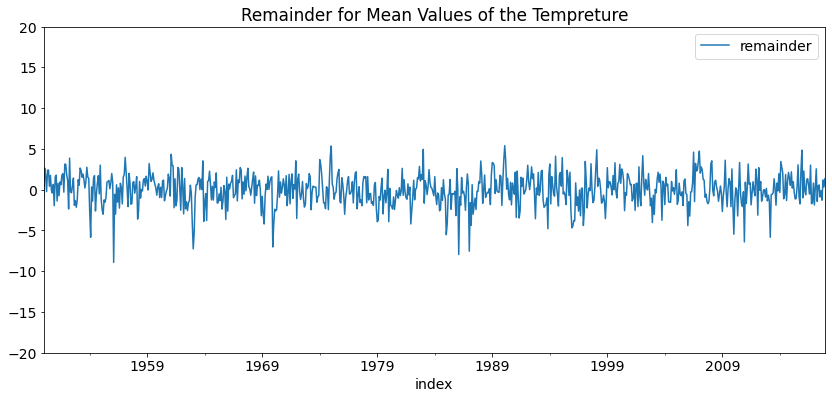

In [201]:
df_mean.plot()
plt.ylim(-20, 20)
plt.title("Remainder for Mean Values of the Tempreture")

In [202]:
print_adf(df_mean)

   
            adf: -16.7
            p: 1.4672068569974804e-29 
            used lag: 1 
            number of observations: 814
            -3.44 (p=0.01; CI=99%) 
            -2.87 (p=0.05; CI=95%)
            -2.57 (p=0.1 CI=90%) 
            information criterion (AIC): 3265.159896768166
            


* adf is out of the confidential level 99% and p is a very small value. So, the remainder for mean value is stationary. (rules: if adf is smaller than CI=99% and p<= 0.05 data is stationary)

## Min values

In [203]:
df_min= pd.read_csv('df_tem_min_train_remainder.csv', index_col=0, parse_dates=True)
df_min.head()

remainder
index                
1950-01-01  -1.918270
1950-02-01   2.350407
1950-03-01   1.128348
1950-04-01   0.090554
1950-05-01   2.105112

Text(0.5, 1.0, 'Remainder for Min Values of the Tempreture')

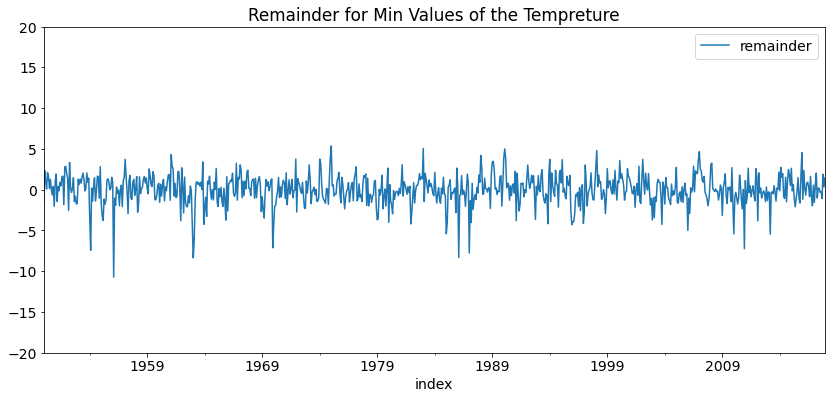

In [204]:
df_min.plot()
plt.ylim(-20, 20)
plt.title("Remainder for Min Values of the Tempreture")

In [205]:
print_adf(df_min)

   
            adf: -22.93
            p: 0.0 
            used lag: 0 
            number of observations: 815
            -3.44 (p=0.01; CI=99%) 
            -2.87 (p=0.05; CI=95%)
            -2.57 (p=0.1 CI=90%) 
            information criterion (AIC): 3197.4634312064854
            


* adf is out of the confidential level 99% and p is 0. So, the remainder for min value is stationary.

## Max values

In [206]:
df_max= pd.read_csv('df_tem_max_train_remainder.csv', index_col=0, parse_dates=True)
df_max.head()

remainder
index                
1950-01-01  -0.752959
1950-02-01   2.482525
1950-03-01   1.671235
1950-04-01  -0.559733
1950-05-01   2.567686

Text(0.5, 1.0, 'Remainder for Max Values of the Tempreture')

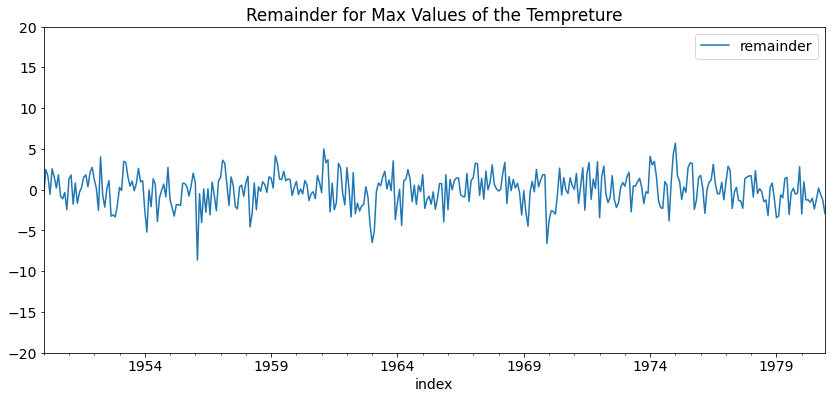

In [207]:
df_max.plot()
plt.ylim(-20, 20)
plt.title("Remainder for Max Values of the Tempreture")

In [208]:
print_adf(df_max)

   
            adf: -15.29
            p: 4.503574867643198e-28 
            used lag: 0 
            number of observations: 371
            -3.45 (p=0.01; CI=99%) 
            -2.87 (p=0.05; CI=95%)
            -2.57 (p=0.1 CI=90%) 
            information criterion (AIC): 1498.6946539843134
            


* adf is out of the confidential level 99% and p is a very small value. So, the remainder for max value is stationary.

# Statsmodels AutoReg

In [209]:
ar_model_mean = AutoReg(endog=df_mean['remainder'], lags=1).fit()
ar_model_mean.summary()

/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              remainder   No. Observations:                  816
Model:                     AutoReg(1)   Log Likelihood               -1670.087
Method:               Conditional MLE   S.D. of innovations              1.878
Date:                Fri, 26 Aug 2022   AIC                           3346.174
Time:                        11:20:40   BIC                           3360.283
Sample:                    02-01-1950   HQIC                          3351.589
                         - 12-01-2017                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0017      0.066      0.025      0.980      -0.127       0.131
remainder.L1     0.2234      0.034      6.543      0.000       0.156       0.290
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.4759           +0.0000j            4.4759            0.0000
-----------------------------------------------------------------------------
"""

In [212]:
ar_model_mean = AutoReg(endog=df_mean['remainder'], lags=4).fit()
ar_model_mean.summary()

/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              remainder   No. Observations:                  816
Model:                     AutoReg(4)   Log Likelihood               -1661.409
Method:               Conditional MLE   S.D. of innovations              1.872
Date:                Fri, 26 Aug 2022   AIC                           3334.818
Time:                        11:21:27   BIC                           3363.015
Sample:                    05-01-1950   HQIC                          3345.643
                         - 12-01-2017                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0023      0.066     -0.036      0.972      -0.131       0.126
remainder.L1     0.2067      0.035      5.888      0.000       0.138       0.275
remainder.L2     0.0511      0.036      1.428      0.153      -0.019       0.121
remainder.L3     0.0495      0.036      1.386      0.166      -0.021       0.120
remainder.L4     0.0035      0.035      0.101      0.920      -0.065       0.072
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9353           -0.0000j            1.9353           -0.0000
AR.2           -1.2855           -3.0450j            3.3052           -0.3136
AR.3           -1.2855           +3.0450j            3.3052            0.3136
AR.4          -13.3870           -0.0000j           13.3870           -0.5000
-----------------------------------------------------------------------------
"""

* If we look at the likelihood of both results, with 3 lags we have slightly higher likelihood. However, the AIC and BICshould be decreased to be able to say 3 lags is a better option but they didn't.

In [210]:
ar_model_min = AutoReg(endog=df_min['remainder'], lags=1).fit()
ar_model_min.summary()

/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              remainder   No. Observations:                  816
Model:                     AutoReg(1)   Log Likelihood               -1634.463
Method:               Conditional MLE   S.D. of innovations              1.798
Date:                Fri, 26 Aug 2022   AIC                           3274.927
Time:                        11:20:41   BIC                           3289.036
Sample:                    02-01-1950   HQIC                          3280.342
                         - 12-01-2017                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0027      0.063      0.043      0.965      -0.121       0.126
remainder.L1     0.2149      0.034      6.285      0.000       0.148       0.282
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.6525           +0.0000j            4.6525            0.0000
-----------------------------------------------------------------------------
"""

In [211]:
ar_model_max = AutoReg(endog=df_max['remainder'], lags=1).fit()
ar_model_max.summary()

/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              remainder   No. Observations:                  372
Model:                     AutoReg(1)   Log Likelihood                -780.217
Method:               Conditional MLE   S.D. of innovations              1.982
Date:                Fri, 26 Aug 2022   AIC                           1566.434
Time:                        11:20:42   BIC                           1578.183
Sample:                    02-01-1950   HQIC                          1571.100
                         - 12-01-1980                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0003      0.103      0.003      0.998      -0.201       0.202
remainder.L1     0.2219      0.051      4.372      0.000       0.122       0.321
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.5058           +0.0000j            4.5058            0.0000
-----------------------------------------------------------------------------
"""